# Часть 1 - подготовка датасета

## Импорт данных и основных пакетов

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import warnings

from sklearn.model_selection import train_test_split

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc
)

from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

pd.set_option('display.float', '{:.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("drive/MyDrive/accepted_2007_to_2018Q4.csv", low_memory = False)

In [ ]:
print('Посмотрим на первые 5 строк:')
print(f'Размер исходного датасета: {data.shape}')
data.head()

Посмотрим на первые 5 строк:
Размер исходного датасета: (2260701, 151)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.000,3600.000,3600.000,36 months,13.990,123.030,C,C4,leadman,10+ years,MORTGAGE,55000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.910,0.000,Aug-2003,675.000,679.000,1.000,30.000,NaN,7.000,0.000,2765.000,29.700,13.000,w,0.000,0.000,4421.724,4421.720,3600.000,821.720,0.000,0.000,0.000,Jan-2019,122.670,NaN,Mar-2019,564.000,560.000,0.000,30.000,1.000,Individual,NaN,NaN,NaN,0.000,722.000,144904.000,2.000,2.000,0.000,1.000,21.000,4981.000,36.000,3.000,3.000,722.000,34.000,9300.000,3.000,1.000,4.000,4.000,20701.000,1506.000,37.200,0.000,0.000,148.000,128.000,3.000,3.000,1.000,4.000,69.000,4.000,69.000,2.000,2.000,4.000,2.000,5.000,3.000,4.000,9.000,4.000,7.000,0.000,0.000,0.000,3.000,76.900,0.000,0.000,0.000,178050.000,7746.000,2400.000,13734.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.000,24700.000,24700.000,36 months,11.990,820.280,C,C1,Engineer,10+ years,MORTGAGE,65000.000,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.060,1.000,Dec-1999,715.000,719.000,4.000,6.000,NaN,22.000,0.000,21470.000,19.200,38.000,w,0.000,0.000,25679.660,25679.660,24700.000,979.660,0.000,0.000,0.000,Jun-2016,926.350,NaN,Mar-2019,699.000,695.000,0.000,NaN,1.000,Individual,NaN,NaN,NaN,0.000,0.000,204396.000,1.000,1.000,0.000,1.000,19.000,18005.000,73.000,2.000,3.000,6472.

In [ ]:
print('Информация о столбцах датасета:')
data.info(verbose = True, null_counts = True)

Информация о столбцах датасета:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 151 columns):
 #    Column                                      Non-Null Count    Dtype  
---   ------                                      --------------    -----  
 0    id                                          2260701 non-null  object 
 1    member_id                                   0 non-null        float64
 2    loan_amnt                                   2260668 non-null  float64
 3    funded_amnt                                 2260668 non-null  float64
 4    funded_amnt_inv                             2260668 non-null  float64
 5    term                                        2260668 non-null  object 
 6    int_rate                                    2260668 non-null  float64
 7    installment                                 2260668 non-null  float64
 8    grade                                       2260668 non-null  object 
 9    sub_grade   

In [ ]:
print('Различные показатели каждого из столбцов:\n')
data.describe()

Различные показатели каждого из столбцов:



,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260664.000,2258957.000,2260639.000,2260668.000,2260668.000,2260638.000,1102166.000,359156.000,2260639.000,2260639.000,2260668.000,2258866.000,2260639.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260668.000,2260523.000,580775.000,2260668.000,120710.000,120706.000,2260639.000,2190392.000,2190392.000,1394538.000,1394539.000,1394539.000,1394539.000,1350744.000,1394539.000,1191818.000,1394539.000,1394539.000,1394539.000,1394320.000,2190392.000,1394539.000,1394538.000,1394538.000,2210638.000,2190322.000,2185733.000,2184597.000,2260523.000,2260639.000,2121597.000,2190391.000,2190391.000,2190392.000,2210638.000,2187256.000,519701.000,1965233.000,740359.000,2190392.000,2190392.000,2190392.000,2202078.000,2190392.000,2190392.000,2190392.000,2190391.000,2190392.000,2202078.000,2107011.000,2190392.000,2190392.000,2190392.000,2190237.000,2185289.000,2259303.000,2260563.000,2190392.000,2210638.000,2210638.000,2190392.000,108020.000,108021.000,108021.000,108021.000,108021.000,108021.000,106184.000,108021.000,108021.000,108021.000,108021.000,35942.000,10917.000,10917.000,10917.000,10917.000,8651.000,10917.000,10917.000,34246.000,34246.000,34246.000
mean,NaN,15046.931,15041.664,15023.438,13.093,445.807,77992.429,18.824,0.307,698.588,702.588,0.577,34.541,72.313,11.612,0.198,16658.458,50.338,24.163,4206.891,4205.965,12082.557,12064.395,9505.772,2431.388,1.518,143.879,23.983,3429.346,687.661,675.540,0.018,44.164,1.000,123624.637,19.252,0.004,232.732,142492.195,0.934,2.779,0.676,1.563,21.222,35506.645,69.141,1.290,2.750,5806.393,57.032,34573.943,1.013,1.477,2.037,4.522,13547.798,11394.263,57.900,0.008,12.370,125.738,181.492,14.024,8.297,1.555,24.845,39.303,7.024,35.782,0.500,3.676,5.629,4.774,7.726,8.413,8.247,14.005,5.578,11.628,0.001,0.003,0.083,2.077,94.115,42.435,0.128,0.047,178242.754,51022.938,23193.768,43732.013,33617.279,669.756,673.756,0.633,1.539,11.469,58.169,3.011,12.533,0.046,0.078,36.938,3.000,155.046,3.000,13.744,454.798,11636.884,1

## Основная часть - подготовка датасета

### Вспомогательные функции для построения графиков

In [ ]:
def plot_dist(dist, name, aspect = 2):
  sns.displot(dist, bins = len(dist.value_counts()), aspect = aspect)
  plt.title(f'Распределение {name}')
  plt.ylabel('Частота появления')

In [ ]:
def plot_pie(data, labels_text, title_text, figsize = (15, 10), legend = []):
  plt.rcParams['figure.figsize'] = figsize
  
  explode = [0.1/data.shape[0]] * data.shape[0]
  plt.pie(data, explode = explode, labels = labels_text, autopct = '%2.2f%%', shadow = True, startangle = 70)
  plt.title(title_text)
  if(legend != []):
    plt.legend(legend)

  plt.show()

In [ ]:
def plot_bar(data, labels, title_text, x_text, y_text, figsize = (15, 10), rotate_x = 0, rotate_text = 0, perc_fontsize = 11, perc_round = 1): 
  plt.rcParams['figure.figsize'] = figsize
  fig, ax = plt.subplots()
  bars = plt.bar(data, labels, width = 0.8, linewidth = 2, alpha = 0.54) # edgecolor='black',

  for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        round(bar.get_height(), perc_round),
        horizontalalignment = 'center',
        verticalalignment = 'bottom',
        weight = 'bold',
        fontsize = perc_fontsize,
        rotation = rotate_text)

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom = False, left = False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color = '#EEEEEE')
  ax.xaxis.grid(False)
  ax.xaxis.set_tick_params(labelrotation = rotate_x)

  ax.set_xlabel(x_text, fontsize = 14, labelpad = 15, color = '#333333')
  ax.set_ylabel(y_text, fontsize = 14, labelpad = 15, color = '#333333')
  ax.set_title(title_text, pad = 15, fontsize = 16, color = '#333333', weight = 'bold')

  fig.tight_layout()

In [ ]:
def plot_count(data, x_val, hue_val, labels, title_text, x_text, y_text, figsize = (15, 10), rotate_x = 0, perc_fontsize = 12, sort_alph = False): 
  plt.rcParams['figure.figsize'] = figsize
  fig, ax = plt.subplots()
  order = sorted(data[x_val].unique()) if sort_alph else data[x_val].value_counts().index
  sns.countplot(x = x_val, data = data, hue = hue_val, order = order, palette=['#E25353',"#53C25D"])

  for p, label in zip(ax.patches, data[x_val].value_counts().index):
    parts = data.groupby(x_val)[hue_val].value_counts()[label]
    ax.annotate(f"{parts[0] / parts[1] * 100:2.1f}%", (p.get_x() + p.get_width() / 2, p.get_height()),
                horizontalalignment = 'center',
                verticalalignment = 'bottom',
                fontsize = perc_fontsize)  

  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom = False, left = False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color = '#EEEEEE')
  ax.xaxis.grid(False)
  ax.xaxis.set_tick_params(labelrotation = rotate_x)

  ax.set_xlabel(x_text, fontsize = 14, labelpad = 15, color = '#333333')
  ax.set_ylabel(y_text, fontsize = 14, labelpad = 15, color = '#333333')
  ax.set_title(title_text, pad = 15, fontsize = 16, color = '#333333', weight = 'bold')
  ax.legend(labels, fontsize = 14)

  fig.tight_layout()

### Обработка таргетной переменной

Таргетная переменная - статус кредита. Посмотрим на распределение этой переменной:



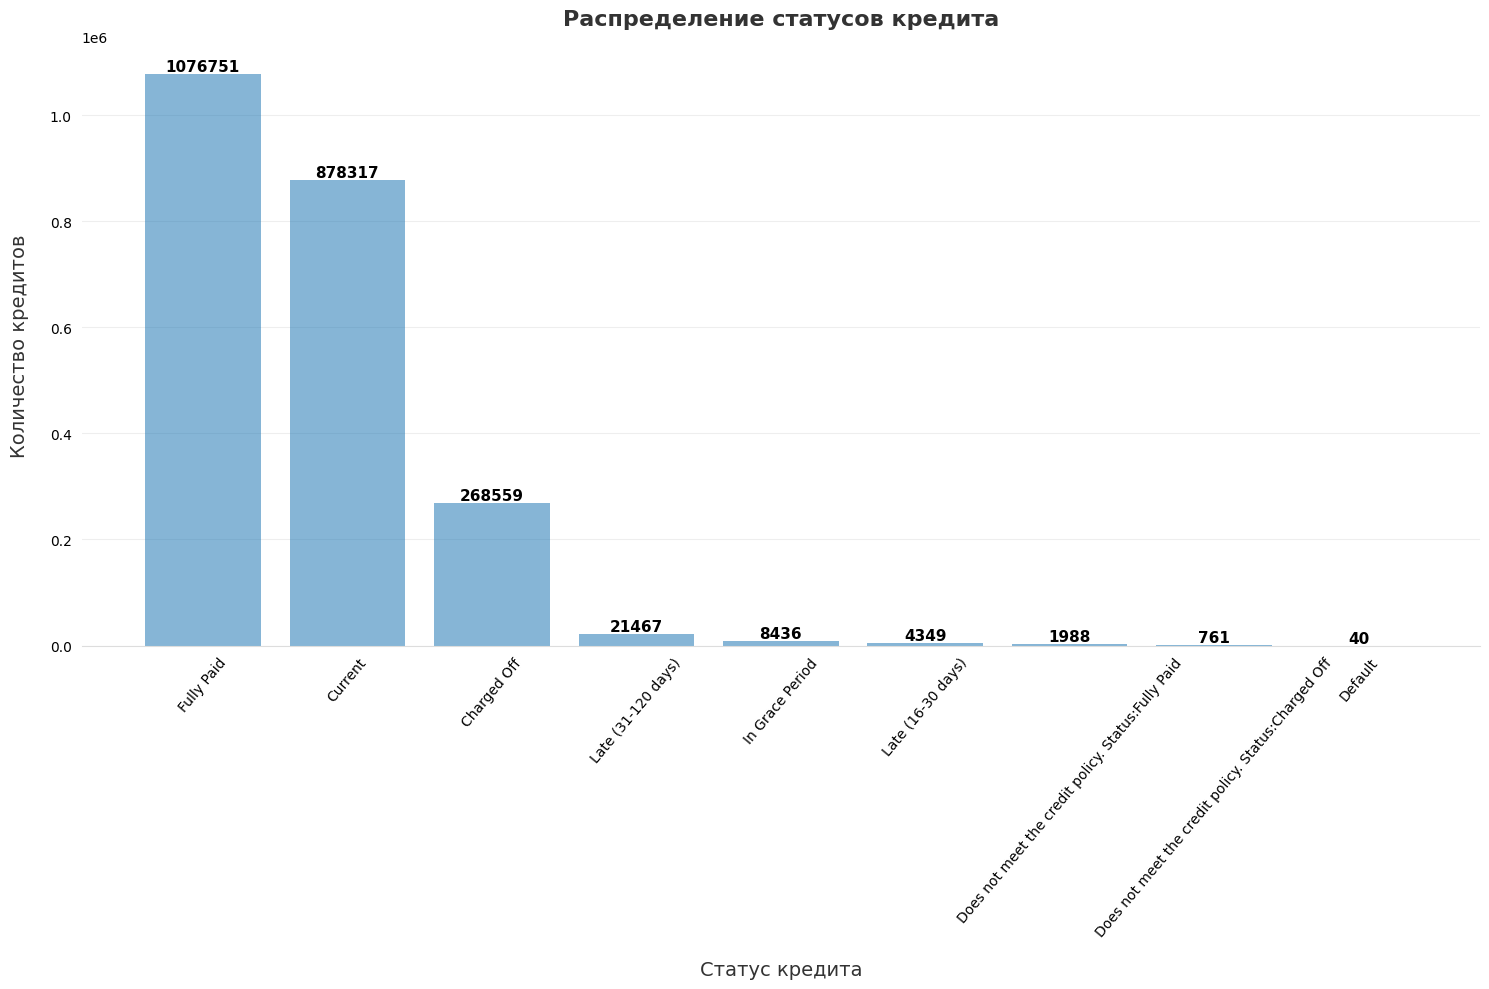

In [ ]:
original_size = data.shape

print('Таргетная переменная - статус кредита. Посмотрим на распределение этой переменной:\n')
counts = data['loan_status'].value_counts()
plot_bar(counts.index, counts, "Распределение статусов кредита", "Статус кредита", "Количество кредитов", rotate_x = 50)

Нас интересуют "хорошие" и "плохие" статусы кредита
К "хорошим" отнесем полностью выплаченные, к "плохим" просроченые или вышедшие в дефолт. Остальные нас не интересуют
Запишем результат кредита в отдельный новый столбец loan_result



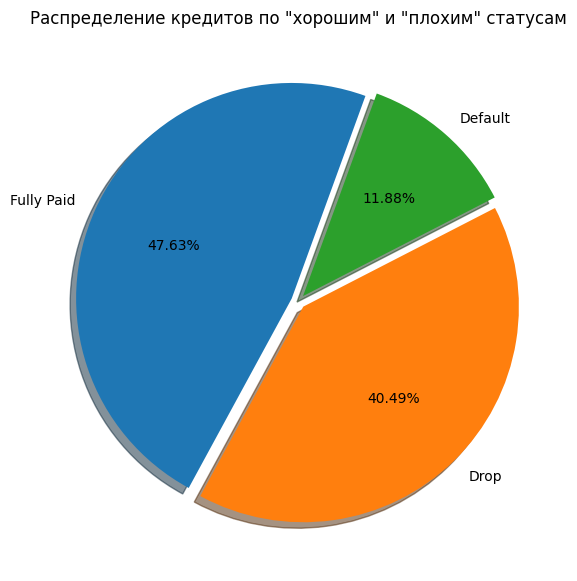

In [ ]:
print('Нас интересуют "хорошие" и "плохие" статусы кредита')
print('К "хорошим" отнесем полностью выплаченные, к "плохим" просроченые или вышедшие в дефолт. Остальные нас не интересуют')
print('Запишем результат кредита в отдельный новый столбец loan_result\n')

good_statuses = ['Fully Paid']
bad_statuses = ['Default', 'Charged Off']

data['loan_result'] = np.nan
def set_loan_result(status):
    if status in good_statuses:
        return 'Fully Paid'
    elif status in bad_statuses:
        return 'Default'
    else:
        return 'Drop'

data['loan_result'] = data['loan_status'].apply(set_loan_result)
data.drop('loan_status', axis = 1, inplace = True)
plot_pie(data['loan_result'].value_counts(), data['loan_result'].value_counts().index, 'Распределение кредитов по "хорошим" и "плохим" статусам', figsize = (7, 7))

Уберем те кредиты, статусы которых нас не интересуют
Итого, из исходного датасета исключили 2260701 - 1345350 = 915351 строк
Объем данных сократился на 40%, но это необходимо для корректного моделирования, так как нас интересуют только особенные статусы кредита



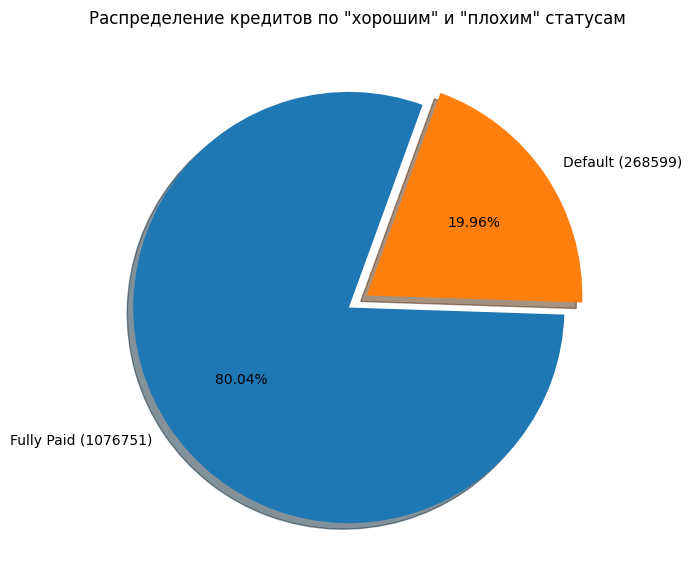

In [ ]:
print('Уберем те кредиты, статусы которых нас не интересуют')
data.drop(data[data.loan_result == 'Drop'].index, inplace = True)
print(f'Итого, из исходного датасета исключили {original_size[0]} - {data.shape[0]} = {original_size[0] - data.shape[0]} строк')
print('Объем данных сократился на 40%, но это необходимо для корректного моделирования, так как нас интересуют только особенные статусы кредита\n')

counts = data['loan_result'].value_counts()
plot_pie(counts, [f'''Fully Paid ({counts['Fully Paid']})''', f'''Default ({counts['Default']})'''], 'Распределение кредитов по "хорошим" и "плохим" статусам', (7, 7))

### Feature-engineering

#### Leak-фичи

In [ ]:
print('Поработаем с, так называемыми, "утечками данных из будущего"')
print('Для корректного моделирования и предсказания нам важно на этапе подготовки датасета определить те фичи, которые являются утчками')
print('То есть, такие фичи, информация из которых не была известна на момент выдачи кредита, т.е. информация из этих фичей, фактически, приходит из будущего')
print('Повнимательнее посмотрим на названия фичей и попробуем понять их смысл, определив, какие из них являются утечками')
print('\n------======------\n')
print('Список числовых фичей-утечек следующий:')
print('funded_amnt - Общая сумма, выделенная по этому кредиту на текущий момент времени')
print('funded_amnt_inv - Общая сумма, выделенная инвесторами по данному кредиту на текущий момент времени')
print('out_prncp - Оставшаяся непогашенной основная сумма на общую сумму финансирования')
print('out_prncp_inv - Оставшаяся непогашенной основная сумма для части общей суммы, финансируемой инвесторами')
print('total_pymnt - Платежи, полученные на текущую дату на общую сумму финансирования')
print('total_pymnt_inv - Платежи, полученные на текущую дату день на часть общей суммы, профинансированной инвесторами')
print('total_rec_prncp - Сумма основного долга, полученная на текущую дату')
print('total_rec_int - Проценты, полученные на текущую дату')
print('total_rec_late_fee - Плата за просрочку, полученная на текущую дату взыскания')
print('collection_recovery_fee - Плата за инкассацию после списания')
print('last_pymnt_amnt - Последняя общая сумма полученного платежа')
print('last_fico_range_low - Последняя нижняя оценка FICO')
print('last_fico_range_high - Последняя верхняя оценка FICO')
print('tot_cur_bal - Общий баланс всех счетов на текущую дату')
print('num_accts_ever_120_pd - Количество счетов, просроченных на 120 или более дней на текущую дату')
print('num_actv_rev_tl - Количество активных на данный момент возобновляемых сделок')
print('num_tl_op_past_12m - Количество открытых за последние 12 месяцев счетов')
print('\n------======------\n')
print('Все эти солбцы, так или иначе, берут информацию из будущего, что является "утечкой", поэтому их нужно исключить из датасета')


cols_to_drop = ['funded_amnt', 'funded_amnt_inv', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_low', 'last_fico_range_high',
'tot_cur_bal', 'num_accts_ever_120_pd', 'num_actv_rev_tl', 'num_tl_op_past_12m']

Поработаем с, так называемыми, "утечками данных из будущего"
Для корректного моделирования и предсказания нам важно на этапе подготовки датасета определить те фичи, которые являются утчками
То есть, такие фичи, информация из которых не была известна на момент выдачи кредита, т.е. информация из этих фичей, фактически, приходит из будущего
Повнимательнее посмотрим на названия фичей и попробуем понять их смысл, определив, какие из них являются утечками

------======------

Список числовых фичей-утечек следующий:
funded_amnt - Общая сумма, выделенная по этому кредиту на текущий момент времени
funded_amnt_inv - Общая сумма, выделенная инвесторами по данному кредиту на текущий момент времени
out_prncp - Оставшаяся непогашенной основная сумма на общую сумму финансирования
out_prncp_inv - Оставшаяся непогашенной основная сумма для части общей суммы, финансируемой инвесторами
total_pymnt - Платежи, полученные на текущую дату на общую сумму финансирования
total_pymnt_inv - Платежи, полученные на

#### Ненужные фичи

In [ ]:
print('Проанализируем некоторые другие фичи:')
print('Значения id уникальны и не влияют на результат')
print('Url-адрес - дополнительная информация, которая не нужна для анализа')
print('Значения почтовых кодов (zip_code) вряд ли пригодятся, так как, во-первых, анонимизированы две последние цифры, во-вторых, есть значение штата (addr_state)')
print('Видно, что заголовок кредита (title) потом преобразовывается в цель кредита (purpose), поэтому сам заголовок не нужен')
print('Значения столбцов hardship_flag и pymnt_plan везде равны N/n, поэтому их можно исключить')
print('Значения policy_code всегда равно 1')
print('Значение int_rate очень сильно коррелирует с грейдом кредита (grade), так как одно следует из другого')
print('Значение installment также очень сильно коррелирует и зависит от общей суммы крдеита (loan_amnt)')
print('Общий возобновляемый остаток по кредиту (revol_bal) используется для расчета коэффициента revolv_util')
print('Общий баланс для покупки по банковским картам (bc_open_to_buy) используется для рассчета коэффициента bc_until')
print('Все эти фичи также можно безболезненно удалить из датасета')

cols_to_drop = cols_to_drop + ['id', 'url', 'title', 'zip_code', 'hardship_flag', 'pymnt_plan', 'policy_code', 'int_rate', 'installment', 'revol_bal', 'bc_open_to_buy']

Проанализируем некоторые другие фичи:
Значения id уникальны и не влияют на результат
Url-адрес - дополнительная информация, которая не нужна для анализа
Значения почтовых кодов (zip_code) вряд ли пригодятся, так как, во-первых, анонимизированы две последние цифры, во-вторых, есть значение штата (addr_state)
Видно, что заголовок кредита (title) потом преобразовывается в цель кредита (purpose), поэтому сам заголовок не нужен
Значения столбцов hardship_flag и pymnt_plan везде равны N/n, поэтому их можно исключить
Значения policy_code всегда равно 1
Значение int_rate очень сильно коррелирует с грейдом кредита (grade), так как одно следует из другого
Значение installment также очень сильно коррелирует и зависит от общей суммы крдеита (loan_amnt)
Общий возобновляемый остаток по кредиту (revol_bal) используется для расчета коэффициента revolv_util
Общий баланс для покупки по банковским картам (bc_open_to_buy) используется для рассчета коэффициента bc_until
Все эти фичи также можно безболезнен

In [ ]:
print(f'Удалим из датасета эти фичи ({len(cols_to_drop)} шт.)')
data.drop(cols_to_drop, axis = 1, inplace = True)
print(f'Размер датасета после удаления: {data.shape}')

Удалим из датасета эти фичи (28 шт.)
Размер датасета после удаления: (1345350, 123)


#### Diff-фичи

In [ ]:
print('Из некоторых пар фичей можно сделать одну фичу, ответственную за разницу')
print('Как правило, речь об общем числе чего-либо и количестве открытых/оставшихся единиц')
print('Создадим на основании следующих пар фичей новую фичу разницы:')

print('total_acc - общее количество кредитных линий, open_acc - число открытых кредитных линий у заемщика ==> acc_diff')
print('num_rev_accts - число возобновляемых счетов, num_op_rev_tl - число открытых возобновляемых счетов ==> num_rev_acc_diff')
print('num_bc_tl - число счетов по банковской карте, num_actv_bc_tl - число активных счетов по банковской карте ==> num_bc_tl_diff')
print('mo_sin_old_rev_tl_op - месяцев с открытия самого раннего счета, mo_sin_rcnt_rev_tl_op - месяцев с открытия последнего счета ==> mo_tl_op_diff')
print('mths_since_recent_bc - месяцев с момента последнего открытия счета по банковской карте, mths_since_recent_inq - месяцев с момента последнего запроса ==> mths_since_recent_diff')
print('num_sats - общее число удовлеторительных счетов , num_bc_sats - число удовлеторительных банковских счетов ==> num_sats_diff')
print('Две фичи fico_range_low и fico_range_high можно превратить в одну fico_range_avg, посчитав среднее значение оценки FICO')


data['lines_acc_diff'] = data['total_acc'] - data['open_acc']
data['num_rev_acc_diff'] = data['num_rev_accts'] - data['num_op_rev_tl']
data['num_bc_tl_diff'] = data['num_bc_tl'] - data['num_actv_bc_tl']
data['mo_tl_op_diff'] = data['mo_sin_old_rev_tl_op'] - data['mo_sin_rcnt_rev_tl_op']
data['mths_since_recent_diff'] = data['mths_since_recent_bc'] - data['mths_since_recent_inq']
data['num_sats_diff'] = data['num_sats'] - data['num_bc_sats']
data['fico_range_avg'] = (data['fico_range_low'] + data['fico_range_high']) / 2

data.drop(['total_acc', 'open_acc', 
           'num_rev_accts', 'num_op_rev_tl',
           'num_bc_tl', 'num_actv_bc_tl',
           'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
           'mths_since_recent_bc', 'mths_since_recent_inq',
           'num_sats', 'num_bc_sats',
           'fico_range_low', 'fico_range_high'],
           axis = 1, inplace = True)
print(f'Размер датасета после удаления: {data.shape}')

Из некоторых пар фичей можно сделать одну фичу, ответственную за разницу
Как правило, речь об общем числе чего-либо и количестве открытых/оставшихся единиц
Создадим на основании следующих пар фичей новую фичу разницы:
total_acc - общее количество кредитных линий, open_acc - число открытых кредитных линий у заемщика ==> acc_diff
num_rev_accts - число возобновляемых счетов, num_op_rev_tl - число открытых возобновляемых счетов ==> num_rev_acc_diff
num_bc_tl - число счетов по банковской карте, num_actv_bc_tl - число активных счетов по банковской карте ==> num_bc_tl_diff
mo_sin_old_rev_tl_op - месяцев с открытия самого раннего счета, mo_sin_rcnt_rev_tl_op - месяцев с открытия последнего счета ==> mo_tl_op_diff
mths_since_recent_bc - месяцев с момента последнего открытия счета по банковской карте, mths_since_recent_inq - месяцев с момента последнего запроса ==> mths_since_recent_diff
num_sats - общее число удовлеторительных счетов , num_bc_sats - число удовлеторительных банковских счетов ==>

#### Null-фичи

Обработаем фичи, у которых пропущено более 50% значений:



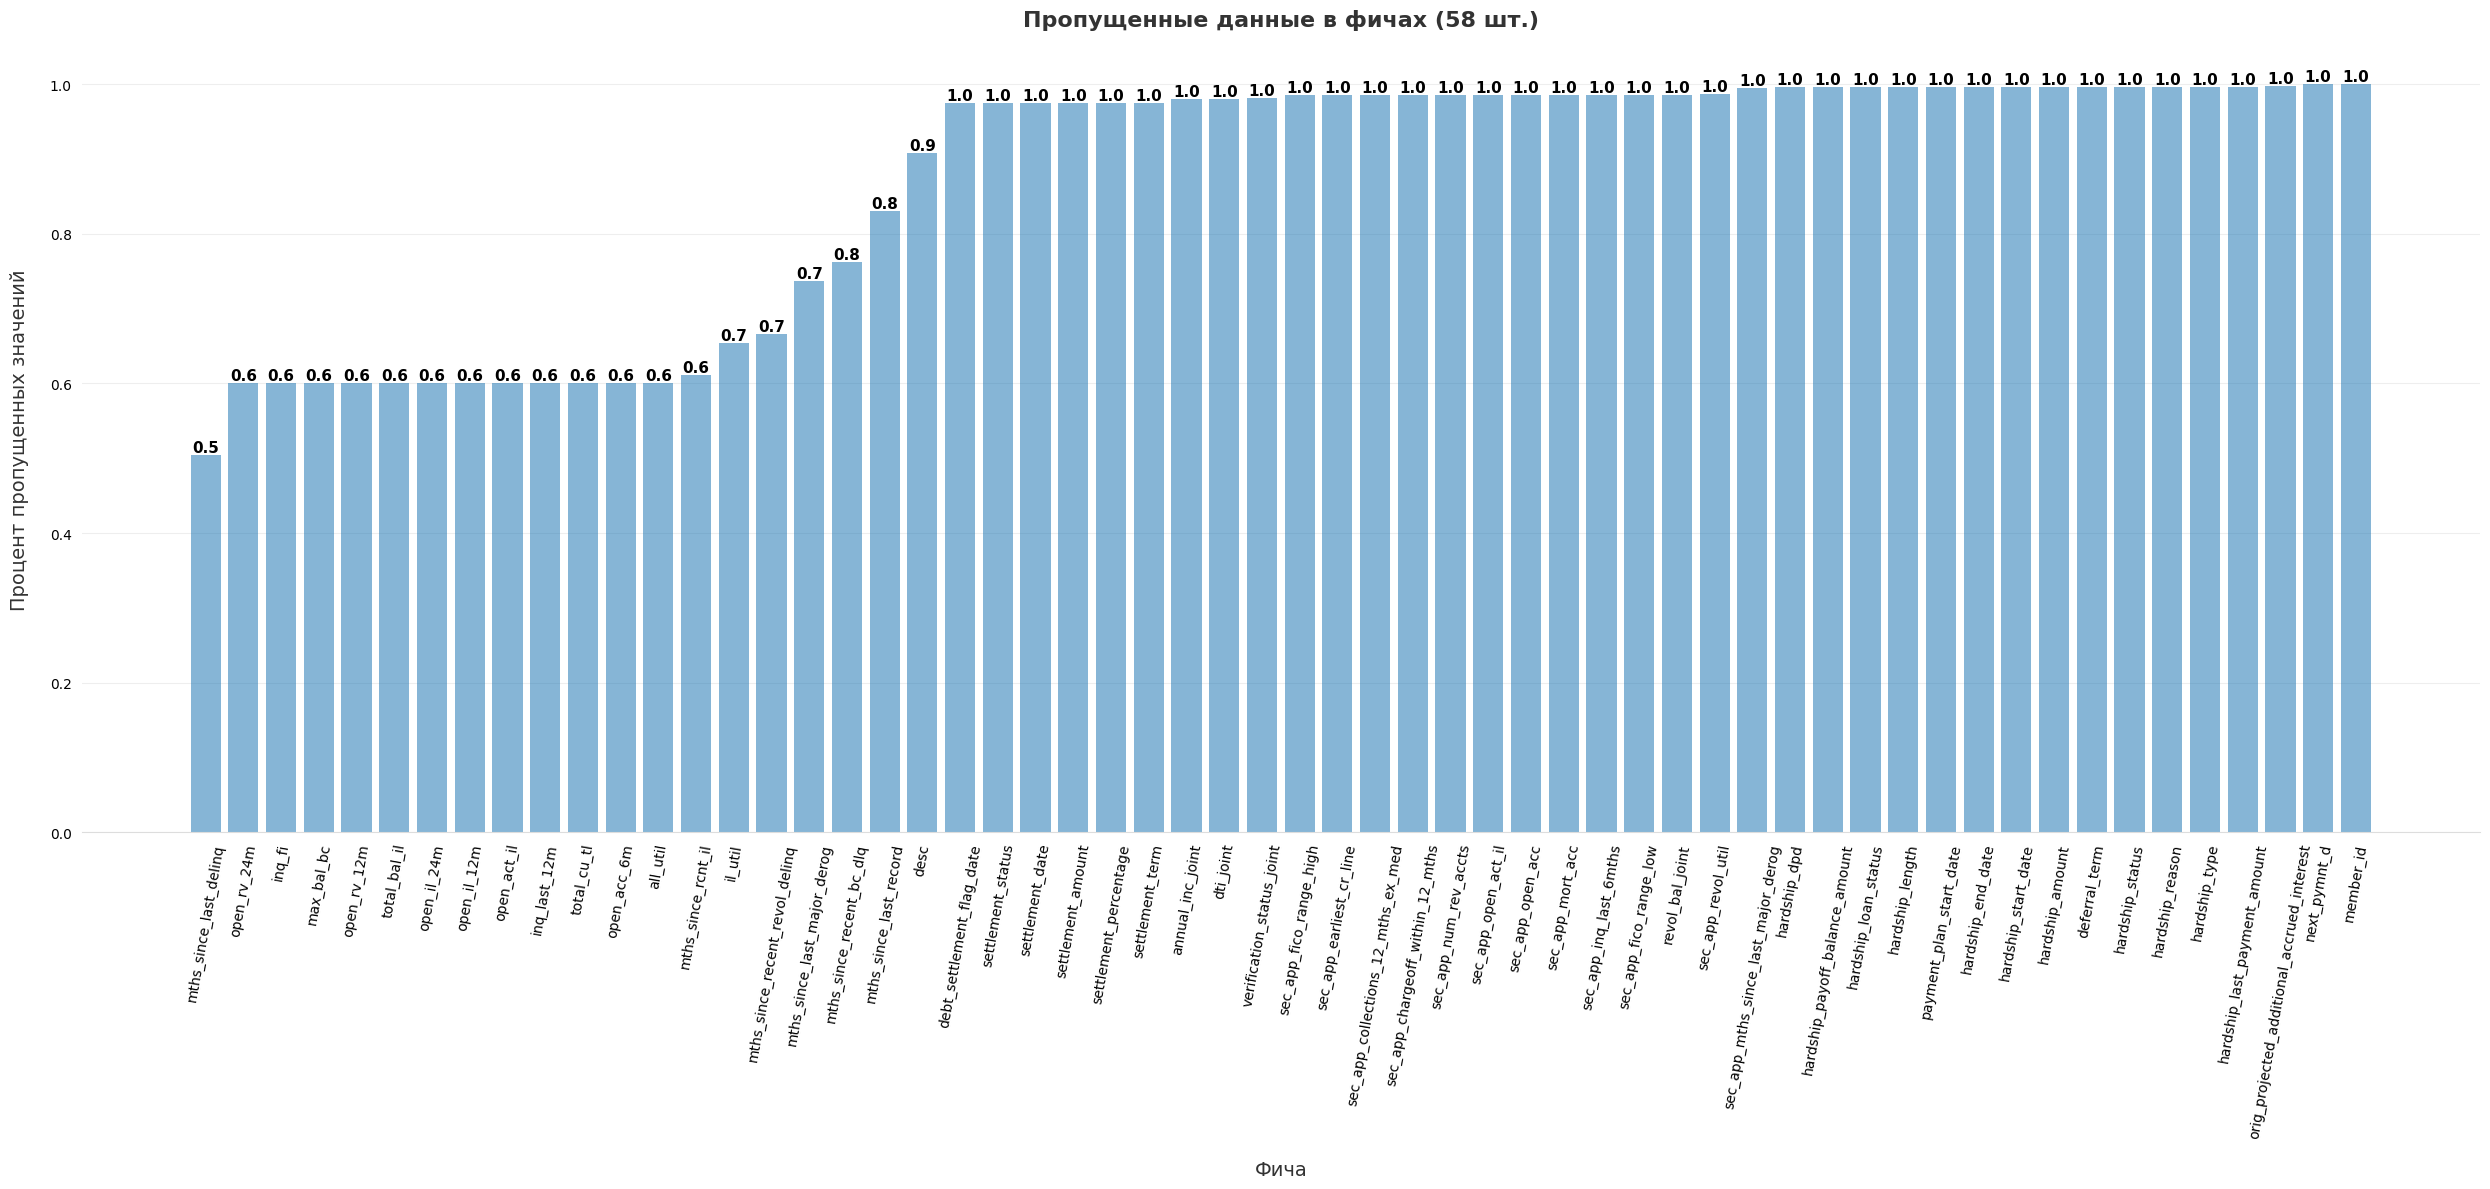

In [ ]:
print('Обработаем фичи, у которых пропущено более 50% значений:\n')

null_data = data.isnull().mean().sort_values()
null_data = null_data[null_data > 0.5]
plot_bar(null_data.index, null_data, f"Пропущенные данные в фичах ({len(null_data)} шт.)", "Фича", "Процент пропущенных значений", (25, 12), 80)

In [ ]:
print('Список фичей с большим процентом пропущенных значений:')
print(null_data)
print('\n-----=====------\n')
print('Видно, что почти все фичи имеют более 80% пропущенных значений, некоторые 60%')
print(f'Удалим из датасета эти фичи ({len(null_data)} шт.), так как их число довольно велико')
data.drop(labels = list(null_data.index), axis = 1, inplace = True)
print(f'Размер датасета после удаления: {data.shape}')

Список фичей с большим процентом пропущенных значений:
mths_since_last_delinq                       0.505
open_rv_24m                                  0.600
inq_fi                                       0.600
max_bal_bc                                   0.600
open_rv_12m                                  0.600
total_bal_il                                 0.600
open_il_24m                                  0.600
open_il_12m                                  0.600
open_act_il                                  0.600
inq_last_12m                                 0.600
total_cu_tl                                  0.600
open_acc_6m                                  0.600
all_util                                     0.600
mths_since_rcnt_il                           0.611
il_util                                      0.654
mths_since_recent_revol_delinq               0.666
mths_since_last_major_derog                  0.737
mths_since_recent_bc_dlq                     0.763
mths_since_last_record     

#### Zero-фичи

In [ ]:
def calculate_zero_percent(data, col):
  return data[data[col] == 0.0].shape[0] / data.shape[0]

Также уберем те фичи, где более 90% значений равны нулю:


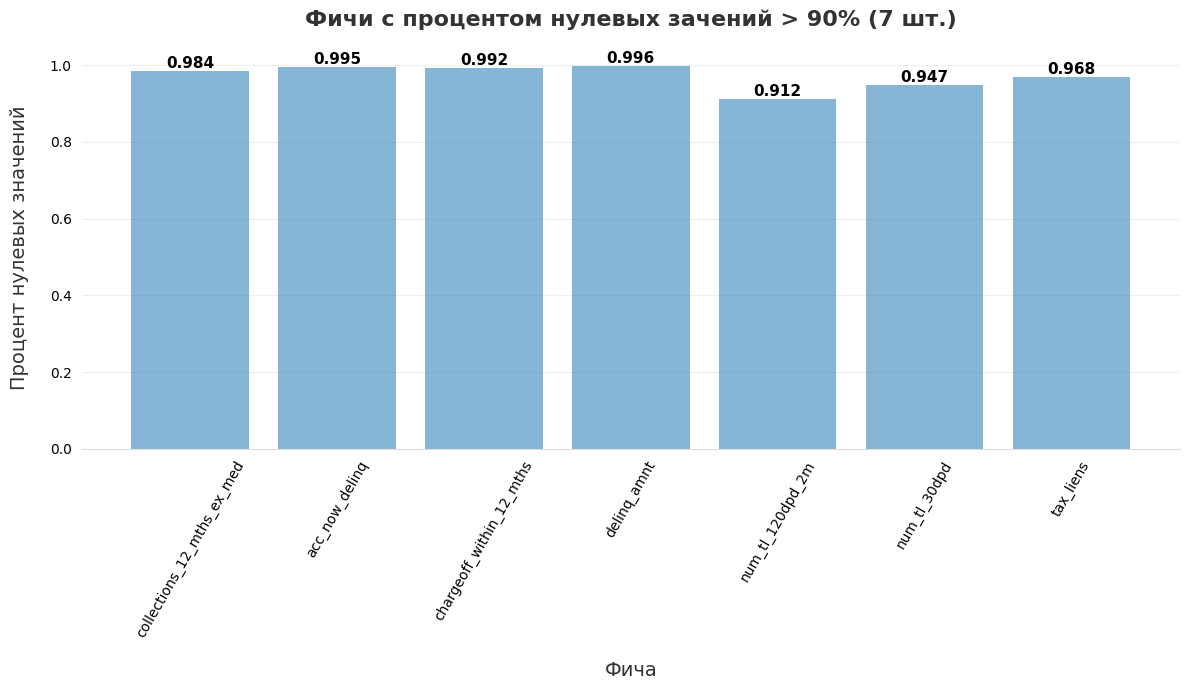

In [ ]:
print('Также уберем те фичи, где более 90% значений равны нулю:')
zero_cols_names = [col for col in data.columns if calculate_zero_percent(data, col) > 0.9]
zero_cols = [calculate_zero_percent(data, col) for col in zero_cols_names]
plot_bar(zero_cols_names, zero_cols, f"Фичи с процентом нулевых зачений > 90% ({len(zero_cols_names)} шт.)", "Фича", "Процент нулевых значений", (12, 7), 60, perc_round = 3)

In [ ]:
print(f'Удалим из датасета эти фичи ({len(zero_cols_names)} шт.), так как количество нулевых значений в них слишком велико')
data.drop(zero_cols_names, axis = 1, inplace = True)
print(f'Размер датасета после удаления: {data.shape}')

Удалим из датасета эти фичи (7 шт.), так как количество нулевых значений в них слишком велико
Размер датасета после удаления: (1345350, 50)


#### Замена null-значений

Посмотрим на количество null-значений в числовых столбцах



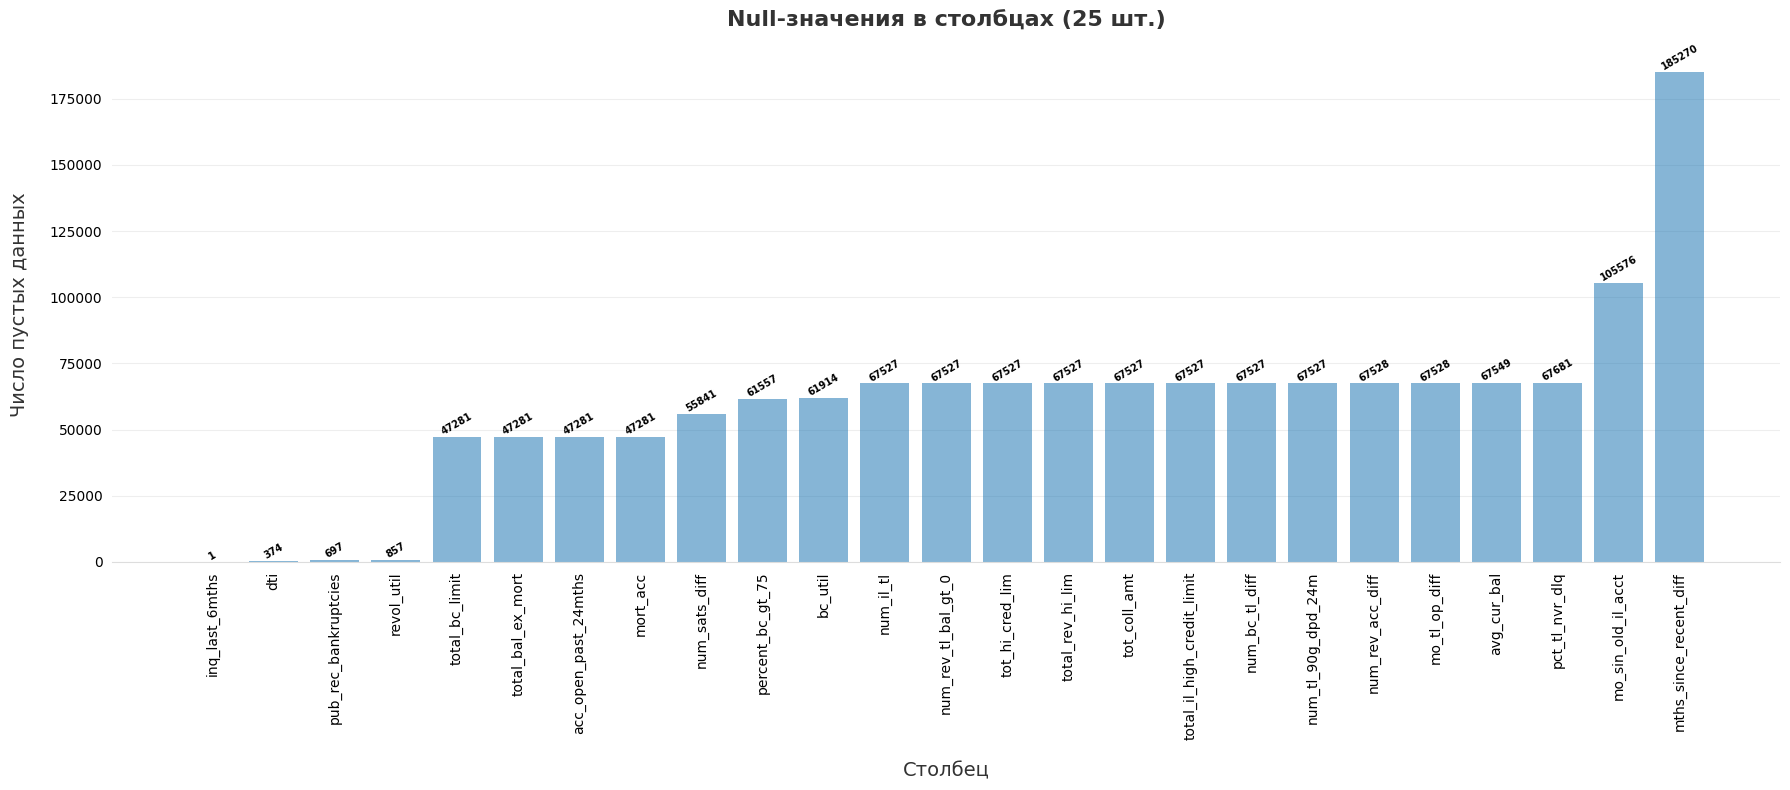

In [ ]:
print('Посмотрим на количество null-значений в числовых столбцах\n')
vals = data.select_dtypes('number').isnull().sum(axis = 0)
vals = vals[vals > 0].sort_values()
plot_bar(vals.index, vals, f'Null-значения в столбцах ({len(vals)} шт.)', 'Столбец', 'Число пустых данных', figsize = (18, 8), rotate_x = 90, perc_fontsize = 7, rotate_text = 30)

In [ ]:
print('Для xgboost-моделирования можно использовать и датасет с пропущенными значениями, однако, лучше избавимся от них')
print('Заменим null-значения в каждом столбце на его среднее значение')
for val in vals.index:
  data[val].fillna(data[val].mean(), inplace = True)
sum = data.select_dtypes('number').isnull().sum(axis = 0).sum()
print(f'После этого числовых столбцов с пропущенными значениями: {sum} шт.')

Для xgboost-моделирования можно использовать и датасет с пропущенными значениями, однако, лучше избавимся от них
Заменим null-значения в каждом столбце на его среднее значение
После этого числовых столбцов с пропущенными значениями: 0 шт.


#### Сильно коррелирующие фичи

Посмотрим на корреляционную матрицу фичей



<Axes: >

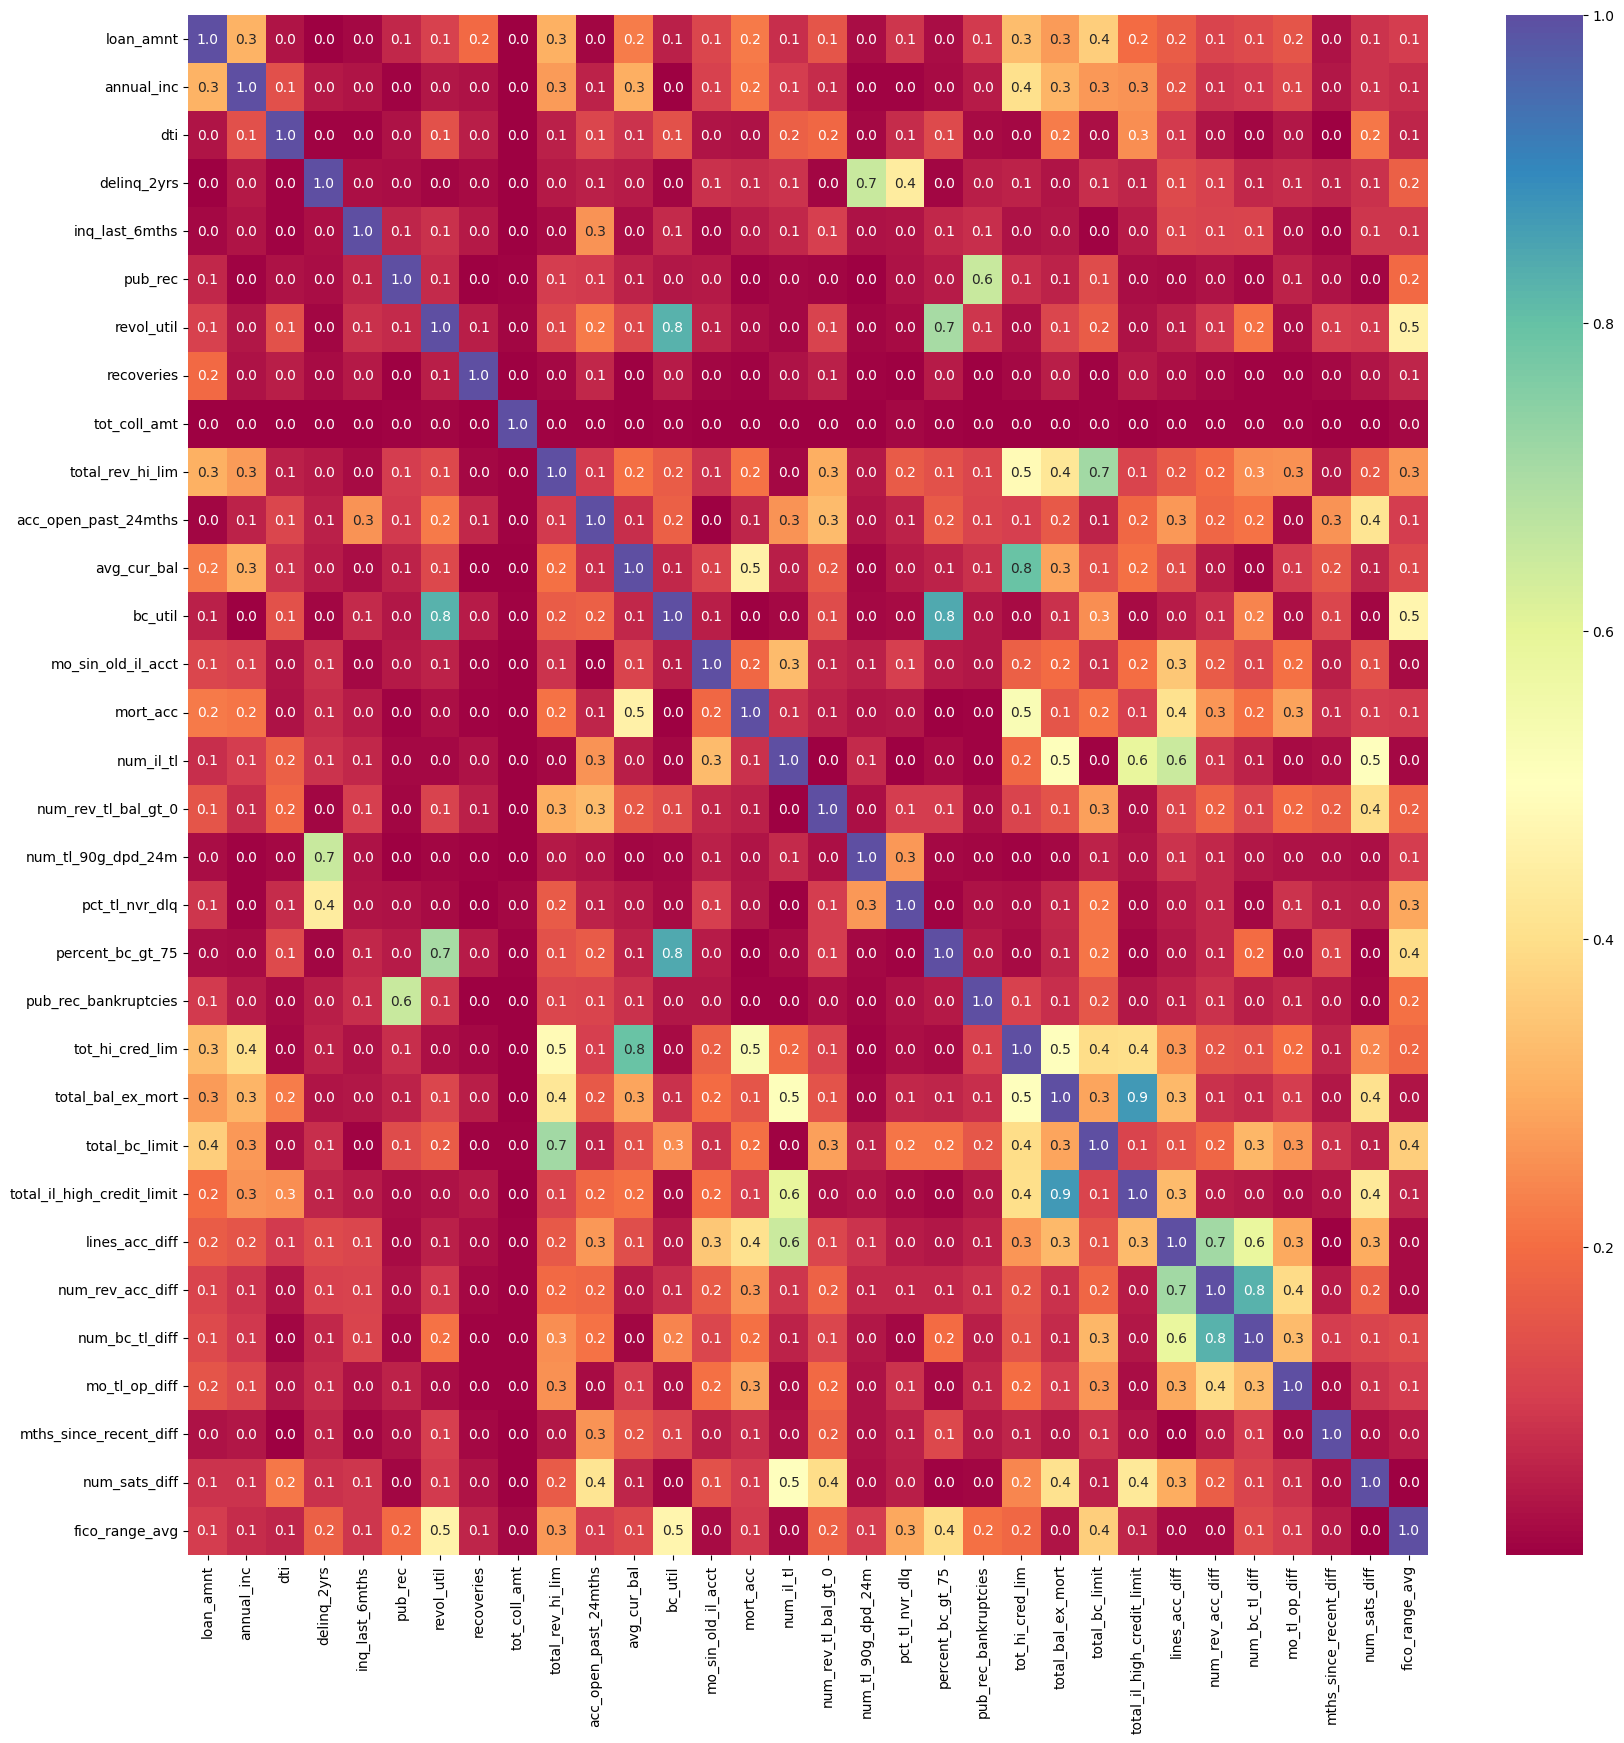

In [ ]:
print('Посмотрим на корреляционную матрицу фичей\n')

figure(figsize=(20, 20))
corr_matrix = data.corr().abs()
sns.heatmap(corr_matrix, annot = True, fmt = ".1f", cmap = "Spectral")

In [ ]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if any(upper[column] >= 0.8)]
print('Список фичей, которые сильно коррелируют с другими:')
print(to_drop)

Список фичей, которые сильно коррелируют с другими:
['bc_util', 'percent_bc_gt_75', 'total_il_high_credit_limit', 'num_bc_tl_diff']


In [ ]:
print('bc_util сильно коррелирует сразу с двумя фичами - rev_util и percent_bc_gt_75, поэтому ее стоит удалить')
print('total_il_high_credit_limit имеет корреляцю 0.9 с total_bal_ex_mort')
print('Фича диффа num_rev_acc_diff сильно коррелирует с num_bc_tl_diff, от одной из них следует избавиться')
print('Удалим сильно коррелирующие фичи')

data.drop(['bc_util', 'total_il_high_credit_limit', 'num_bc_tl_diff'], axis = 1, inplace = True)
print(f'Размер датасета после удаления: {data.shape}')

bc_util сильно коррелирует сразу с двумя фичами - rev_util и percent_bc_gt_75, поэтому ее стоит удалить
total_il_high_credit_limit имеет корреляцю 0.9 с total_bal_ex_mort
Фича диффа num_rev_acc_diff сильно коррелирует с num_bc_tl_diff, от одной из них следует избавиться
Удалим сильно коррелирующие фичи
Размер датасета после удаления: (1345350, 47)


### Обработка категориальных переменных

#### Простое перекодирование на 0 и 1

In [ ]:
print('Поработаем с нечисловыми переменныим:\n')
data.select_dtypes('object').head()

Поработаем с нечисловыми переменныим:



,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,last_credit_pull_d,application_type,disbursement_method,debt_settlement_flag,loan_result
0,36 months,C,C4,leadman,10+ years,MORTGAGE,Not Verified,Dec-2015,debt_consolidation,PA,Aug-2003,w,Jan-2019,Mar-2019,Individual,Cash,N,Fully Paid
1,36 months,C,C1,Engineer,10+ years,MORTGAGE,Not Verified,Dec-2015,small_business,SD,Dec-1999,w,Jun-2016,Mar-2019,Individual,Cash,N,Fully Paid
2,60 months,B,B4,truck driver,10+ years,MORTGAGE,Not Verified,Dec-2015,home_improvement,IL,Aug-2000,w,Jun-2017,Mar-2019,Joint App,Cash,N,Fully Paid
4,60 months,F,F1,Contract Specialist,3 years,MORTGAGE,Source Verified,Dec-2015,major_purchase,PA,Jun-1998,w,Jul-2016,Mar-2018,Individual,Cash,N,Fully Paid
5,36 months,C,C3,Veterinary Tecnician,4 years,RENT,Source Verified,Dec-2015,debt_consolidation,GA,Oct-1987,w,May-2017,May-2017,Individual,Cash,N,Fully Paid


In [ ]:
print('Найдем все столбцы, которые можно превратить в фиктивные перменные, т.е. закодировать как 0 или 1 и посмотрим на количество значений в них:\n')
dummies = []

for col in data.select_dtypes('object'):
  if(len(data[col].value_counts()) == 2):
    display(data[col].value_counts())
    print()
    dummies.append(col)

Найдем все столбцы, которые можно превратить в фиктивные перменные, т.е. закодировать как 0 или 1 и посмотрим на количество значений в них:



 36 months    1020768
 60 months     324582
Name: term, dtype: int64

w    784041
f    561309
Name: initial_list_status, dtype: int64

Individual    1319544
Joint App       25806
Name: application_type, dtype: int64

Cash         1338450
DirectPay       6900
Name: disbursement_method, dtype: int64

N    1312068
Y      33282
Name: debt_settlement_flag, dtype: int64

Fully Paid    1076751
Default        268599
Name: loan_result, dtype: int64

In [ ]:
print('Значение столбца term закодируем как 36 или 60, в зависимости от продолжительности кредита в месяцах')
print('Остальные категориальные фичи заменим на дамми-переменные (0 или 1):\n')

for dummy in dummies:
  if(dummy == 'term'):
    map_vals = {str(data[dummy].unique()[0]): 36, str(data[dummy].unique()[1]): 60}
  else:
    map_vals = {str(data[dummy].unique()[0]): 1, str(data[dummy].unique()[1]): 0}
  data[dummy] = data[dummy].map(map_vals)

data[dummies].head()

Значение столбца term закодируем как 36 или 60, в зависимости от продолжительности кредита в месяцах
Остальные категориальные фичи заменим на дамми-переменные (0 или 1):



,term,initial_list_status,application_type,disbursement_method,debt_settlement_flag,loan_result
0,36,1,1,1,1,1
1,36,1,1,1,1,1
2,60,1,0,1,1,1
4,60,1,1,1,1,1
5,36,1,1,1,1,1


#### Фичи с датами

In [ ]:
import datetime

datetime_columns = ['issue_d', 'last_pymnt_d', 'earliest_cr_line', 'last_credit_pull_d']
print('Посмотрим на все переменные, хранящие значение даты:\n')
display(data[datetime_columns].head())

print('\nДля построения lifetime-кривых нам понадобится значение duration для каждого кредита')
print('Рассчитаем это значение следующим образом:')
print('Если кредит "хороший", то есть выплачен, длиной для него будет являться весь срок кредита (36 или 60 месяцев)')
print('Если кредит "плохой", то есть просрочен, длиной для него будет являться срок выплаты кредита до дефолта (дата последнего платежа - дата выдачи)')
print('Преобразуем наш датасет по данным правилам и добавим столбец duration')

Посмотрим на все переменные, хранящие значение даты:



,issue_d,last_pymnt_d,earliest_cr_line,last_credit_pull_d
0,Dec-2015,Jan-2019,Aug-2003,Mar-2019
1,Dec-2015,Jun-2016,Dec-1999,Mar-2019
2,Dec-2015,Jun-2017,Aug-2000,Mar-2019
4,Dec-2015,Jul-2016,Jun-1998,Mar-2018
5,Dec-2015,May-2017,Oct-1987,May-2017



Для построения lifetime-кривых нам понадобится значение duration для каждого кредита
Рассчитаем это значение следующим образом:
Если кредит "хороший", то есть выплачен, длиной для него будет являться весь срок кредита (36 или 60 месяцев)
Если кредит "плохой", то есть просрочен, длиной для него будет являться срок выплаты кредита до дефолта (дата последнего платежа - дата выдачи)
Преобразуем наш датасет по данным правилам и добавим столбец duration


In [ ]:
print('Приведем интересующие нас столбцы last_pymnt_d и issue_d, к типу datetime, затем запишем значение duration по установленным правилам')
print('Посмотрим на некоторые значения строк. Если значение loan_result равно 1, значит кредит был успешно выплачен, если 0 - просрочен')
print('Выведем в столбцах первые 20 кредитов и посмотрим на значение duration, которое рассчитывается исходя из результата кредита:\n')

data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'])
data['issue_d'] = pd.to_datetime(data['issue_d'])

data['duration'] = ((data['last_pymnt_d'] - data['issue_d']) // np.timedelta64(1, 'M'))
data.loc[data['loan_result'] == 1, 'duration'] = data['term']
display(data[['term', 'last_pymnt_d', 'issue_d', 'loan_result', 'duration']].head(20).T)
print('\nВидно, что значение duration корректно рассчитывается и для выплаченных кредитов берет значение term, а для невыплаченных разницу между последним платежем и датой выдачи')

Приведем интересующие нас столбцы last_pymnt_d и issue_d, к типу datetime, затем запишем значение duration по установленным правилам
Посмотрим на некоторые значения строк. Если значение loan_result равно 1, значит кредит был успешно выплачен, если 0 - просрочен
Выведем в столбцах первые 20 кредитов и посмотрим на значение duration, которое рассчитывается исходя из результата кредита:



,0,1,2,4,5,6,7,8,9,12,13,14,15,16,17,19,20,21,22,23
term,36,36,60,60,36,36,36,36,36,36,60,36,36,36,60,36,60,60,36,36
last_pymnt_d,2019-01-01 00:00:00,2016-06-01 00:00:00,2017-06-01 00:00:00,2016-07-01 00:00:00,2017-05-01 00:00:00,2016-11-01 00:00:00,2017-01-01 00:00:00,2018-08-01 00:00:00,2017-04-01 00:00:00,2017-03-01 00:00:00,2017-05-01 00:00:00,2017-05-01 00:00:00,2018-02-01 00:00:00,2016-09-01 00:00:00,2016-03-01 00:00:00,2016-05-01 00:00:00,2017-03-01 00:00:00,2017-09-01 00:00:00,2017-12-01 00:00:00,2019-01-01 00:00:00
issue_d,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00,2015-12-01 00:00:00
loan_result,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
duration,36.000,36.000,60.000,60.000,36.000,36.000,36.000,36.000,36.000,36.000,16.000,36.000,36.000,36.000,60.000,36.000,60.000,60.000,36.000,36.000



Видно, что значение duration корректно рассчитывается и для выплаченных кредитов берет значение term, а для невыплаченных разницу между последним платежем и датой выдачи


In [ ]:
print('Значения столбцов с датами и временем больше не нужны, поэтому их можно удалить')
print('Фича term будет сильно коррелировать с duration, так как рассчитывается напрямую, поэтому ее тоже уберем')

data.drop(datetime_columns, axis = 1, inplace = True)
data.drop('term', axis = 1, inplace = True)

Значения столбцов с датами и временем больше не нужны, поэтому их можно удалить
Фича term будет сильно коррелировать с duration, так как рассчитывается напрямую, поэтому ее тоже уберем


In [ ]:
print('Посмотрим, корректно ли заполнился столбец duration:')
display(data[data.duration.isnull()].head())

Посмотрим, корректно ли заполнился столбец duration:


,loan_amnt,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,initial_list_status,recoveries,application_type,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mort_acc,num_il_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,debt_settlement_flag,loan_result,lines_acc_diff,num_rev_acc_diff,mo_tl_op_diff,mths_since_recent_diff,num_sats_diff,fico_range_avg,duration
4671,12000.000,B,B1,Director of Acute Care Unit,< 1 year,RENT,60000.000,Not Verified,credit_card,OK,18.100,0.000,0.000,0.000,81.800,1,0.000,1,0.000,19000.000,3.000,4893.000,177.000,2.000,8.000,3.000,0.000,100.000,100.000,0.000,38601.000,29357.000,12500.000,1,1,0,16.000,8.000,211.000,0.000,4.000,702.000,NaN
5279,10000.000,E,E5,Merchant Account Executive,4 years,RENT,65000.000,Not Verified,other,MI,5.300,0.000,4.000,0.000,11.600,1,1229.560,1,0.000,51900.000,4.000,868.000,99.000,1.000,6.000,6.000,0.000,95.800,33.300,0.000,55400.000,9543.000,42100.000,1,1,0,12.000,6.000,187.000,20.000,6.000,697.000,NaN
6459,29850.000,D,D4,Director of Engineering,4 years,OWN,225000.000,Source Verified,debt_consolidation,TX,0.370,1.000,1.000,0.000,19.000,1,4459.860,1,4084.000,5800.000,2.000,79044.000,40.000,3.000,2.000,2.000,0.000,100.000,0.000,0.000,422800.000,1101.000,5500.000,1,1,0,10.000,6.000,92.000,27.000,3.000,667.000,NaN
7558,15000.000,B,B3,owner,5 years,OWN,90000.000,Not Verified,other,TX,31.440,1.000,0.000,0.000,8.000,1,0.000,1,68.000,19000.000,2.000,19242.000,136.000,1.000,13.000,2.000,1.000,76.200,0.000,0.000,243850.000,50419.000,9300.000,1,1,0,13.000,3.000,80.000,15.559,6.000,717.000,NaN
7608,12950.000,E,E2,driver,8 years,RENT,36000.000,Verified,debt_consolidation,CA,37.830,0.000,1.000,0.000,78.100,1,1938.760,1,0.000,22800.000,12.000,2484.000,119.000,0.000,15.000,7.000,0.000,100.000,75.000,0.000,39377.000,29812.000,15200.000,1,1,0,18.000,5.000,94.000,9.000,9.000,667.000,NaN


In [ ]:
print('Видно, что некоторые строки имеют duration = NaN')
print('Такие строки должны быть удалены, так как являются некорректными для анализа')
data.drop(data[data.duration.isnull()].index, axis = 0, inplace = True)
print(f'Размер датасета после удаления: {data.shape}')

Видно, что некоторые строки имеют duration = NaN
Такие строки должны быть удалены, так как являются некорректными для анализа
Размер датасета после удаления: (1343037, 43)


#### Стаж работы 

In [ ]:
print('Посмотрим на значения стажа работы заемщиков:')
data['emp_length'].value_counts()

Посмотрим на значения стажа работы заемщиков:


10+ years    441648
2 years      121536
< 1 year     107868
3 years      107403
1 year        88345
5 years       83980
4 years       80387
6 years       62615
8 years       60594
7 years       59523
9 years       50857
Name: emp_length, dtype: int64

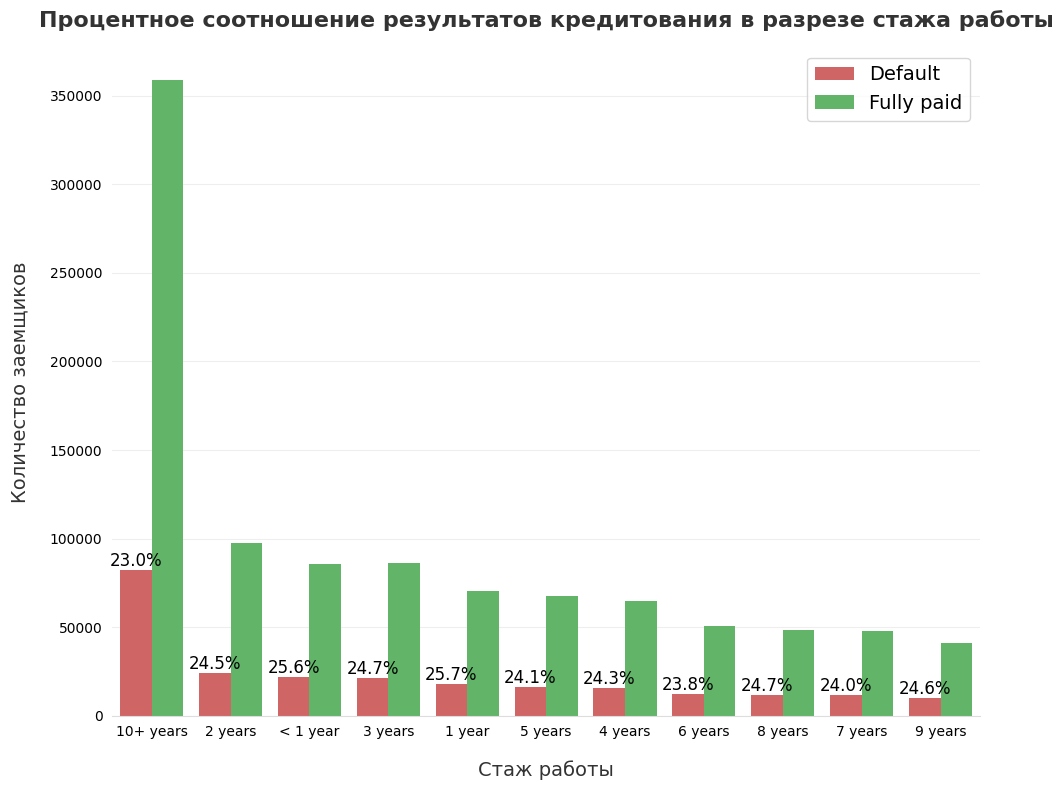

In [ ]:
plot_count(data, 
           'emp_length',
           'loan_result',
           ['Default', 'Fully paid'],
           'Процентное соотношение результатов кредитования в разрезе стажа работы',
           'Стаж работы',
           'Количество заемщиков',
           figsize = (10, 8))

In [ ]:
print('Видно, что при любом стаже работы процент заемщиков, вышедших в дефолт остается около 24-25%, поэтому данную переменную можно не брать в расчет')
data.drop(labels = 'emp_length', axis = 1, inplace = True)

Видно, что при любом стаже работы процент заемщиков, вышедших в дефолт остается около 24-25%, поэтому данную переменную можно не брать в расчет


#### Штаты США

Распределим штаты США заемщиков по их географическому расположению, сопоставив для каждого штата его часть света.



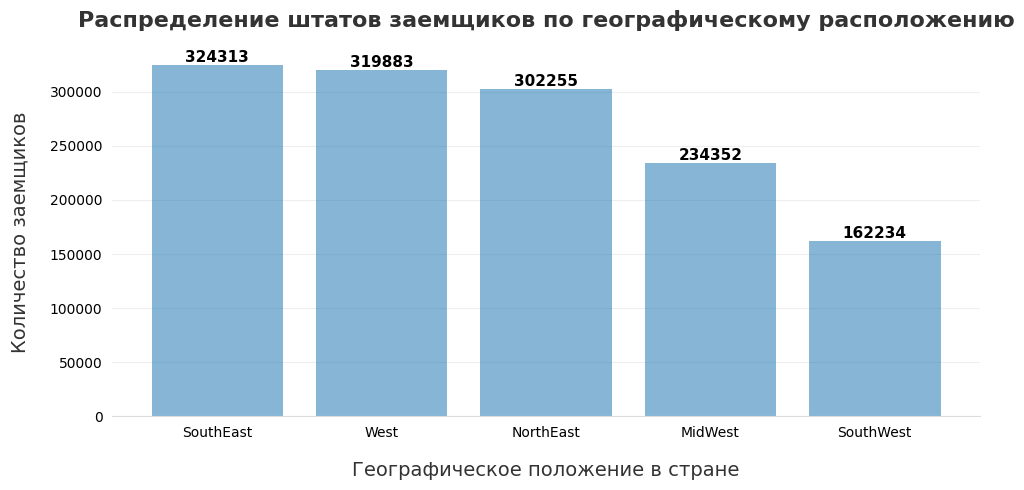

In [ ]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


def get_geo_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'

print('Распределим штаты США заемщиков по их географическому расположению, сопоставив для каждого штата его часть света.\n')
data['addr_state'] = data['addr_state'].apply(get_geo_regions)

plot_bar(data.addr_state.value_counts().index,
         data.addr_state.value_counts(), 
         "Распределение штатов заемщиков по географическому расположению",
         "Географическое положение в стране",
         "Количество заемщиков",
         figsize=(10, 5))

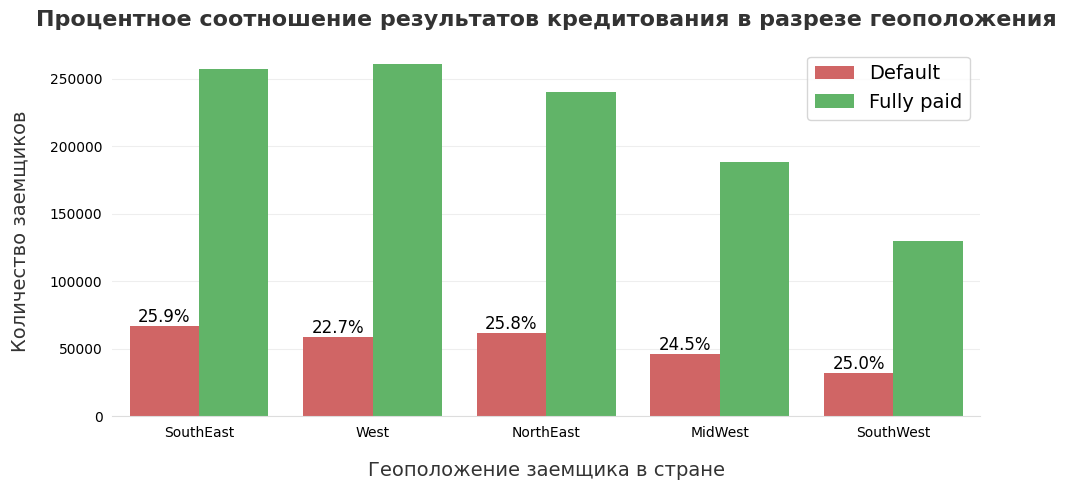

In [ ]:
plot_count(data, 
           'addr_state', 
           'loan_result',
           ['Default', 'Fully paid'], 
           'Процентное соотношение результатов кредитования в разрезе геоположения', 
           'Геоположение заемщика в стране',
           'Количество заемщиков', 
           figsize = (10, 5))

In [ ]:
print('5 категорий геоположения в стране гораздо меньше, чем число штатов, поэтому новый столбец можно будет легко использовать для кодирвания')

5 категорий геоположения в стране гораздо меньше, чем число штатов, поэтому новый столбец можно будет легко использовать для кодирвания


#### Цели кредита

Посмотрим на цели кредитов и результаты выплат по ним:



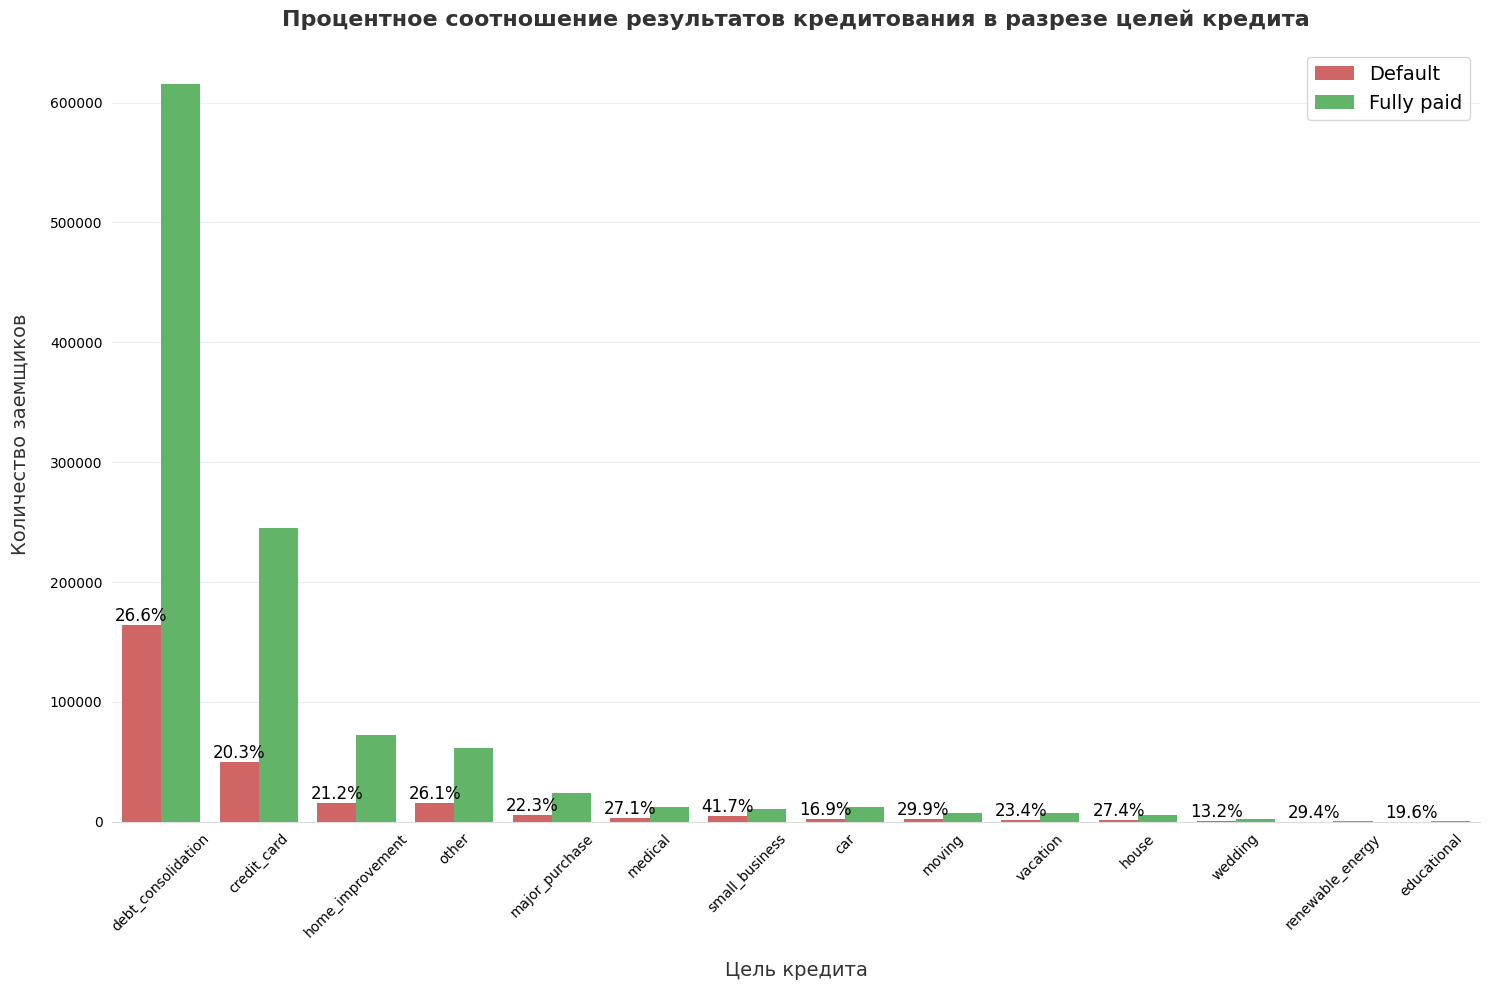

In [ ]:
print('Посмотрим на цели кредитов и результаты выплат по ним:\n')
plot_count(data,
           'purpose', 
           'loan_result',
           ['Default', 'Fully paid'], 
           'Процентное соотношение результатов кредитования в разрезе целей кредита', 
           'Цель кредита', 
           'Количество заемщиков',
           rotate_x = 45)

In [ ]:
print('Видно, что целей кредита немного, причем процент дефолтов по ним разный, поэтому эта фича важна для анализа и будет обработана в будущем')
print(f'Процент 5 самых популярных целей кредита от общего числа: {data.purpose.value_counts()[:5].sum() / data.purpose.shape[0] :.2f}')
print('5 самых популярных целей составляют 94% от всех данных датасета, поэтому записи с оставшимися целями можно исключить, так как их немного')

data.drop(data[data['purpose'].isin(data.purpose.value_counts()[:5].index) == False].index, axis = 0, inplace = True)
print(f'Размер датасета после удаления: {data.shape}')

Видно, что целей кредита немного, причем процент дефолтов по ним разный, поэтому эта фича важна для анализа и будет обработана в будущем
Процент 5 самых популярных целей кредита от общего числа: 0.94
5 самых популярных целей составляют 94% от всех данных датасета, поэтому записи с оставшимися целями можно исключить, так как их немного
Размер датасета после удаления: (1268442, 42)


#### Статус подтверждения кредита

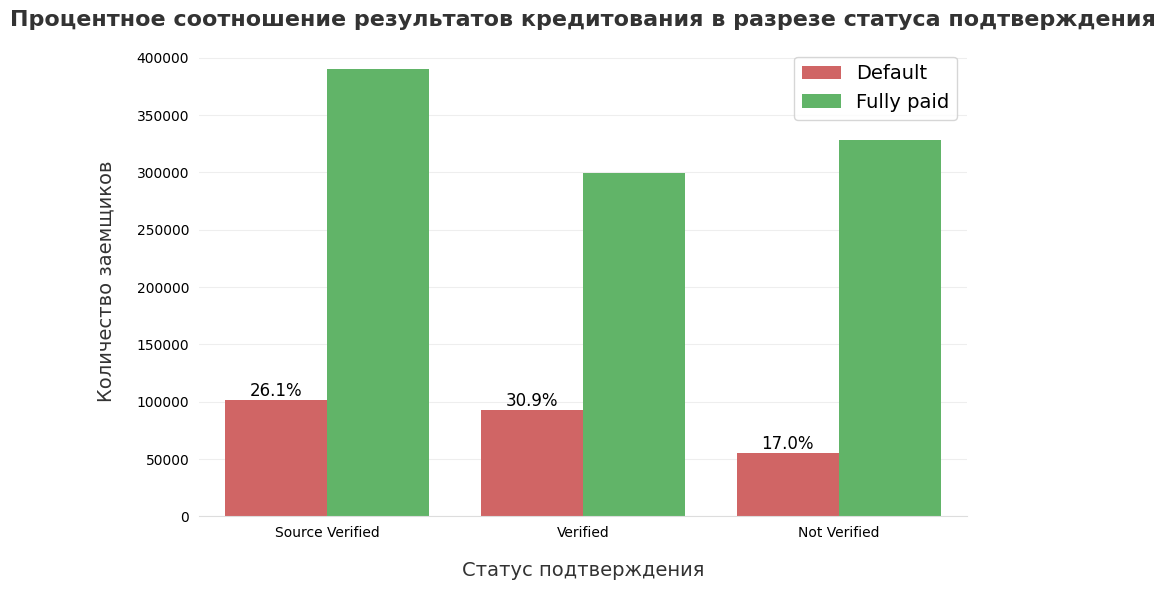

In [ ]:
plot_count(data, 
           'verification_status',
           'loan_result', 
           ['Default', 'Fully paid'], 
           'Процентное соотношение результатов кредитования в разрезе статуса подтверждения', 
           'Статус подтверждения', 
           'Количество заемщиков', 
           figsize = (9, 6))

Исходя из логики доверия к подтверждаемым данным, можно выстроить цепочку:
Source Verified > Verified > Not Verified
Поэтому эти значения можно закодировать как 2, 1 и 0 соответственно



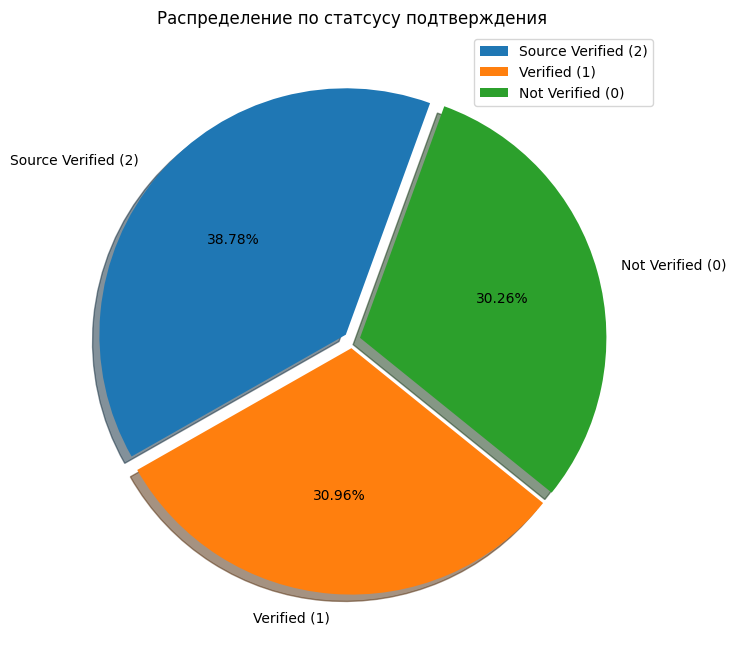

In [ ]:
print('Исходя из логики доверия к подтверждаемым данным, можно выстроить цепочку:')
print('Source Verified > Verified > Not Verified')
print('Поэтому эти значения можно закодировать как 2, 1 и 0 соответственно\n')

status_map = {
    "verification_status":{
      "Source Verified": 2,
      "Verified": 1,
      "Not Verified": 0
    }
}
statuses = [f'{k[0]} ({k[1]})' for k in status_map["verification_status"].items()]

data = data.replace(status_map)
plot_pie(data['verification_status'].value_counts(), statuses, 'Распределение по статсусу подтверждения', (8, 8), statuses)

#### Недвижимость

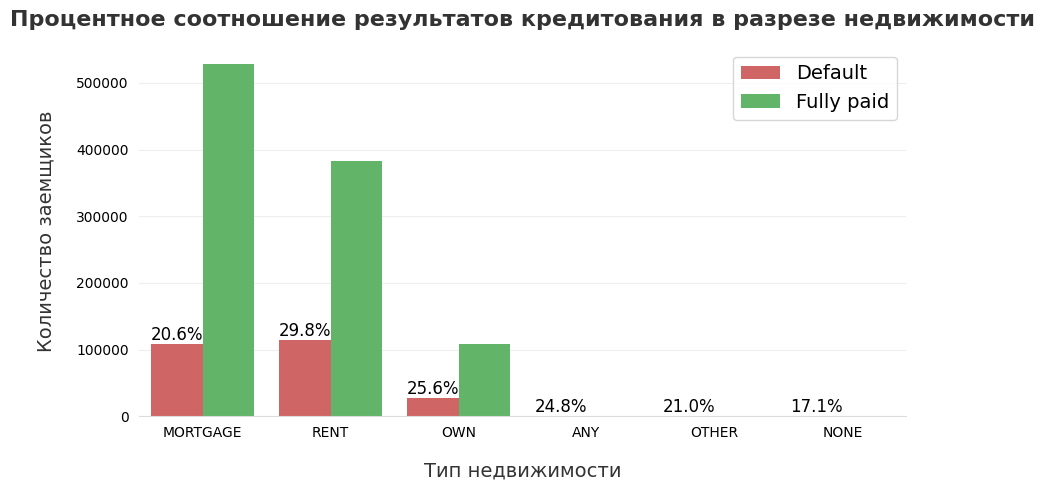

In [ ]:
plot_count(data, 
           'home_ownership', 
           'loan_result', 
           ['Default', 'Fully paid'],
           'Процентное соотношение результатов кредитования в разрезе недвижимости', 
           'Тип недвижимости', 
           'Количество заемщиков', 
           figsize = (9, 5))

Видно, что большая часть приходится на недвижимость из популярных категорий: ипотека, рента или собственность
MORTGAGE    636172
RENT        496124
OWN         135725
Name: home_ownership, dtype: int64
Оставшихся значений в процентном соотношении очень мало:



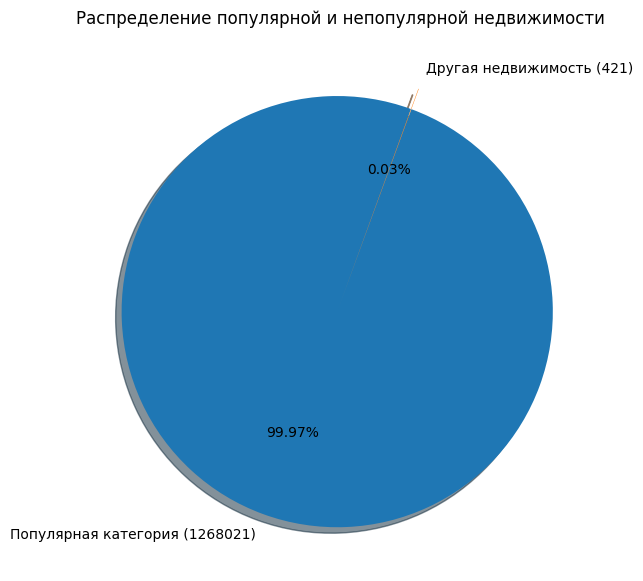

In [ ]:
ownerships = data['home_ownership'].value_counts()[:3]
print('Видно, что большая часть приходится на недвижимость из популярных категорий: ипотека, рента или собственность')
print(ownerships)
print('Оставшихся значений в процентном соотношении очень мало:\n')

popular_owns = data[data['home_ownership'].isin(ownerships.index) == True].shape[0]
unpopular_owns = data[data['home_ownership'].isin(ownerships.index) == False].shape[0]


plot_pie(np.array([popular_owns, unpopular_owns]),
         [f'''Популярная категория ({popular_owns})''', f'''Другая недвижимость ({unpopular_owns})'''], 
         'Распределение популярной и непопулярной недвижимости', (7, 7))

In [ ]:
print('Исходя из такого малого количества записей, недвижимость из категории ANY, OTHER, NONE можно удалить')
print('После удаления в строках останутся только заемщики с недвижимостью из популярной категории:\n')

data.drop(data[data['home_ownership'].isin(ownerships.index) == False].index, axis = 0, inplace = True)
data[['home_ownership', 'loan_result']].head()

Исходя из такого малого количества записей, недвижимость из категории ANY, OTHER, NONE можно удалить
После удаления в строках останутся только заемщики с недвижимостью из популярной категории:



,home_ownership,loan_result
0,MORTGAGE,1
2,MORTGAGE,1
4,MORTGAGE,1
5,RENT,1
6,MORTGAGE,1


#### Профессии

In [ ]:
print('Посмотрим на профессии заемщиков')
print('Для этого преобразуем все профессии к нижнему регистру и уберем все строки, где профессия не заполнена')

data['emp_title'] = data['emp_title'].apply(lambda x: str(x).lower())
data.drop(data[data.emp_title == 'nan'].index, inplace = True)
data[['emp_title', 'loan_result']].head()

Посмотрим на профессии заемщиков
Для этого преобразуем все профессии к нижнему регистру и уберем все строки, где профессия не заполнена


,emp_title,loan_result
0,leadman,1
2,truck driver,1
4,contract specialist,1
5,veterinary tecnician,1
6,vice president of recruiting operations,1


Теперь посмотрим на топ 30 самых популярных профессий:



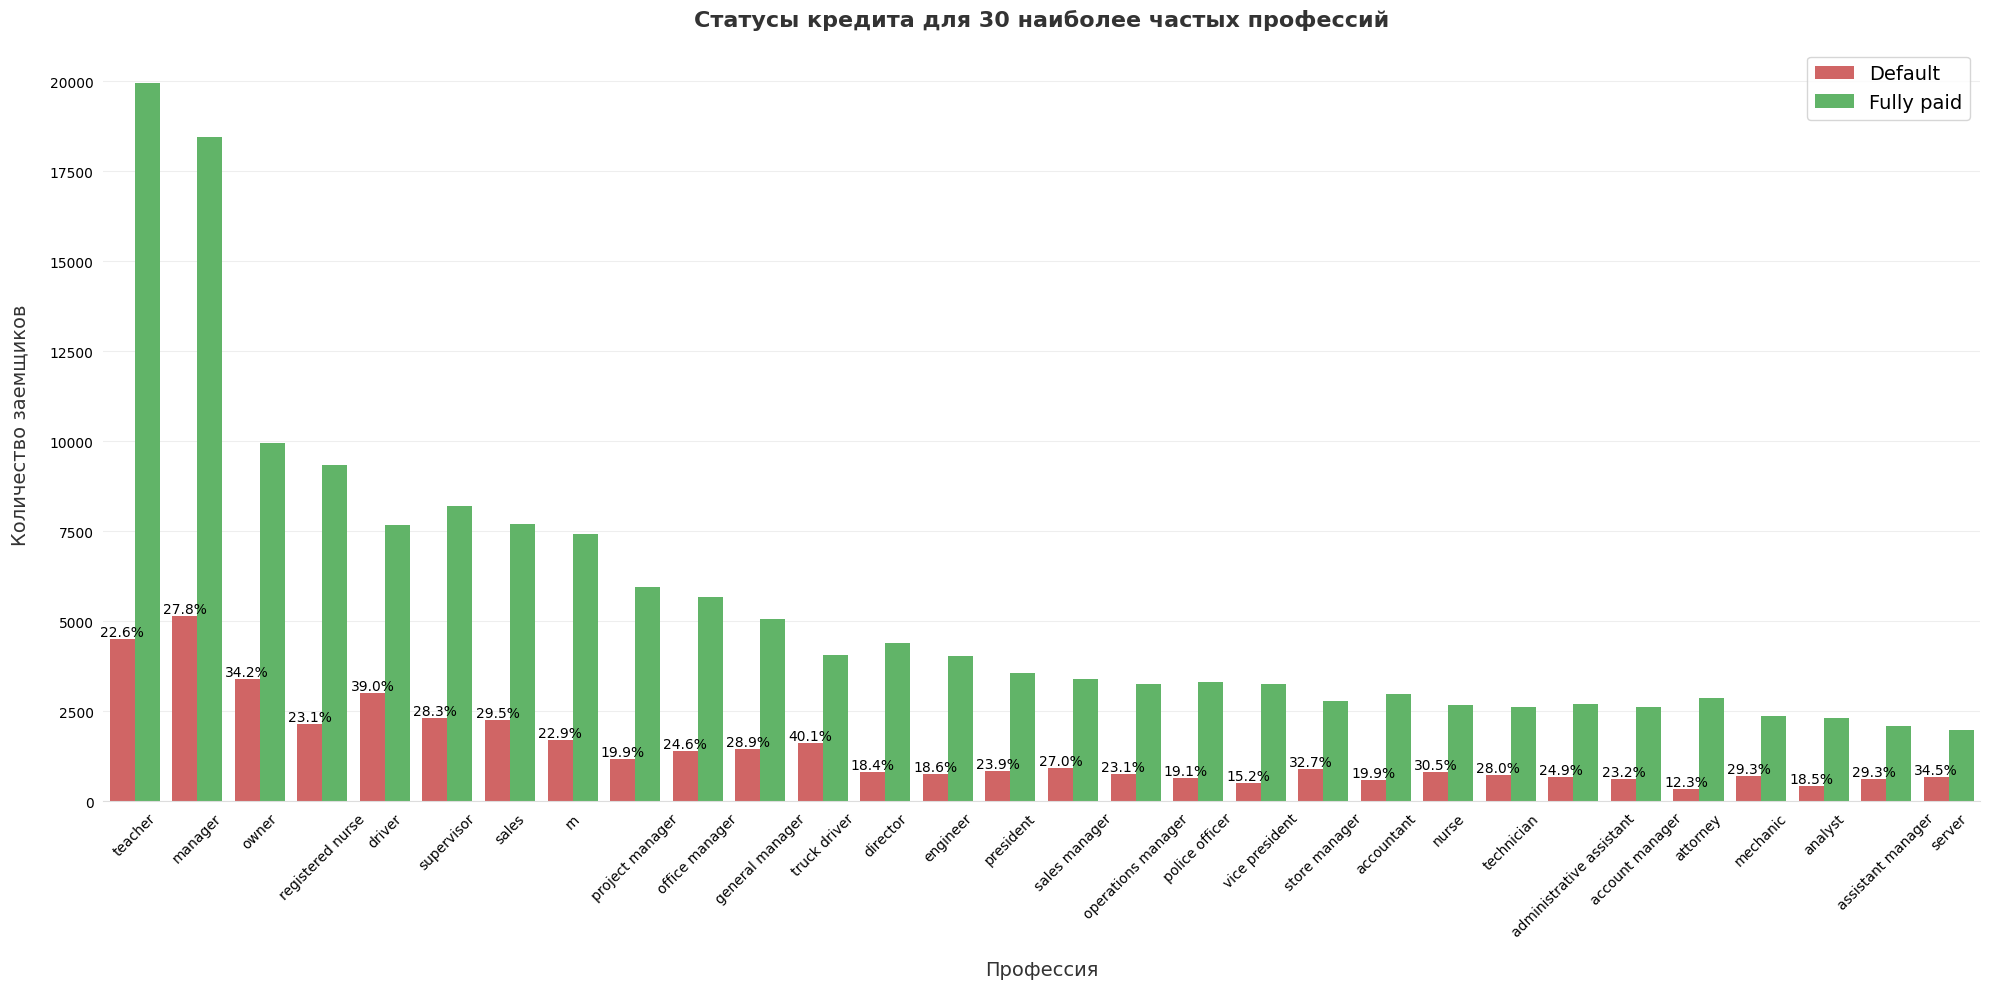

In [ ]:
print('Теперь посмотрим на топ 30 самых популярных профессий:\n')

top30 = data.emp_title.value_counts()[:30]
plot_count(data.loc[data['emp_title'].isin(top30.index)], 
           'emp_title', 
           'loan_result', 
           ['Default', 'Fully paid'], 
           'Статусы кредита для 30 наиболее частых профессий',
           'Профессия', 
           'Количество заемщиков', 
           figsize = (20, 10),
           rotate_x = 45,
           perc_fontsize = 10)

Для того, чтобы понять, стоит ли вообще оставлять фичу профессии, посмотрим на количество уникальных профессий
Для этого будем идти от самых популярных профессий к менее популярным и суммировать число кредиторов с такой профессией
Затем посчитаем процентное соотношение полученной суммы на каждом шаге к количеству всех заемщиков датасета и посмотрим на значеня
Проделаем это для первых топ-50 профессий:



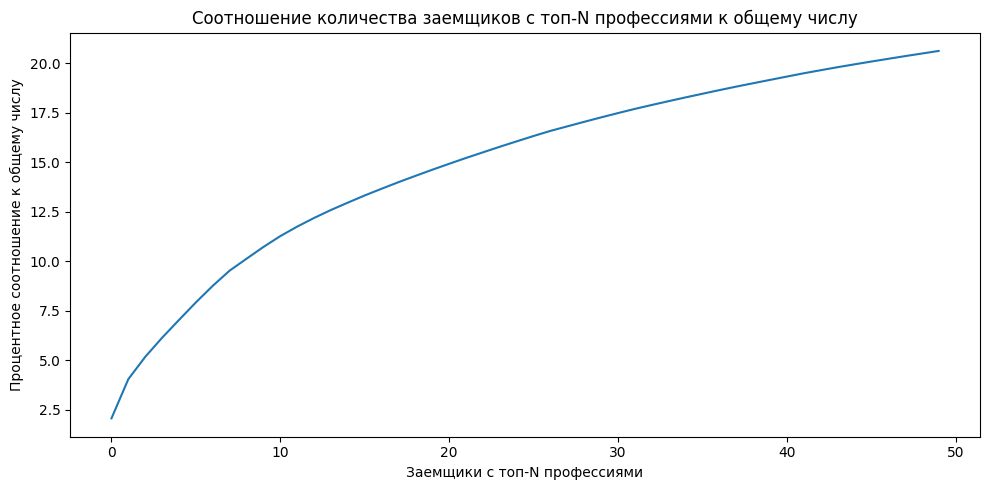

In [ ]:
sum = 0
sums = []
allsum = data['emp_title'].shape[0]
for emp in data['emp_title'].value_counts()[:50]:
  sum += emp
  sums.append(sum / allsum * 100)

print('Для того, чтобы понять, стоит ли вообще оставлять фичу профессии, посмотрим на количество уникальных профессий')
print('Для этого будем идти от самых популярных профессий к менее популярным и суммировать число кредиторов с такой профессией')
print('Затем посчитаем процентное соотношение полученной суммы на каждом шаге к количеству всех заемщиков датасета и посмотрим на значеня')
print('Проделаем это для первых топ-50 профессий:\n')

plt.figure(figsize=(10, 5))
plt.plot(sums);
plt.title('Соотношение количества заемщиков с топ-N профессиями к общему числу')
plt.xlabel('Заемщики с топ-N профессиями')
plt.ylabel('Процентное соотношение к общему числу')
plt.tight_layout()

In [ ]:
print(f'Всего разных профессий в датасете: {data.emp_title.value_counts().shape[0]} шт.')
print('При этом видно, что если взять даже топ-50 самых популярных профессий, а остальные выкинуть, из исходного датасета будут исключены почти 80% записей')
print('Получается, что для того, чтобы не терять огромные объемы данных из датасета, нужно брать слишком много различных профессий, что негативно скажется на количестве фичей')
print('Если сделать это, при последующем кодировании этой категориальной переменной, будут проблемы, так как различных значений слишком много')
print(f'Для примера, заемщиуи с профессией из списка топ-50 занимают {data.emp_title.value_counts()[:50].sum() / allsum * 100:2.2f}% от всех данных')
print(f'С профессией из списка топ-100 занимают {data.emp_title.value_counts()[:100].sum() / allsum * 100:2.2f}% от всех данных')
print(f'С профессией из списка топ-1000 занимают {data.emp_title.value_counts()[:1000].sum() / allsum * 100:2.2f}% от всех данных')
print(f'С профессией из списка топ-10000 занимают {data.emp_title.value_counts()[:10000].sum() / allsum * 100:2.2f}% от всех данных')

print('\nТаким образом, получается, что если включить фичу профессии в выборку, у нее будет слишком много различных значений для кодирования, поэтому ее мы вынуждены убрать')
data.drop('emp_title', axis = 1, inplace = True)

Всего разных профессий в датасете: 310487 шт.
При этом видно, что если взять даже топ-50 самых популярных профессий, а остальные выкинуть, из исходного датасета будут исключены почти 80% записей
Получается, что для того, чтобы не терять огромные объемы данных из датасета, нужно брать слишком много различных профессий, что негативно скажется на количестве фичей
Если сделать это, при последующем кодировании этой категориальной переменной, будут проблемы, так как различных значений слишком много
Для примера, заемщиуи с профессией из списка топ-50 занимают 20.63% от всех данных
С профессией из списка топ-100 занимают 25.81% от всех данных
С профессией из списка топ-1000 занимают 46.57% от всех данных
С профессией из списка топ-10000 занимают 65.03% от всех данных

Таким образом, получается, что если включить фичу профессии в выборку, у нее будет слишком много различных значений для кодирования, поэтому ее мы вынуждены убрать


#### Грейд/сабгрейд кредита

In [ ]:
print('Далее посмотрим на последний вид категориальных фичей - грейды кредита')
print('В исходной выборке есть грейд кредита и его сабгрейд, дающий более детальное представление о его оценке')

Далее посмотрим на последний вид категориальных фичей - грейды кредита
В исходной выборке есть грейд кредита и его сабгрейд, дающий более детальное представление о его оценке


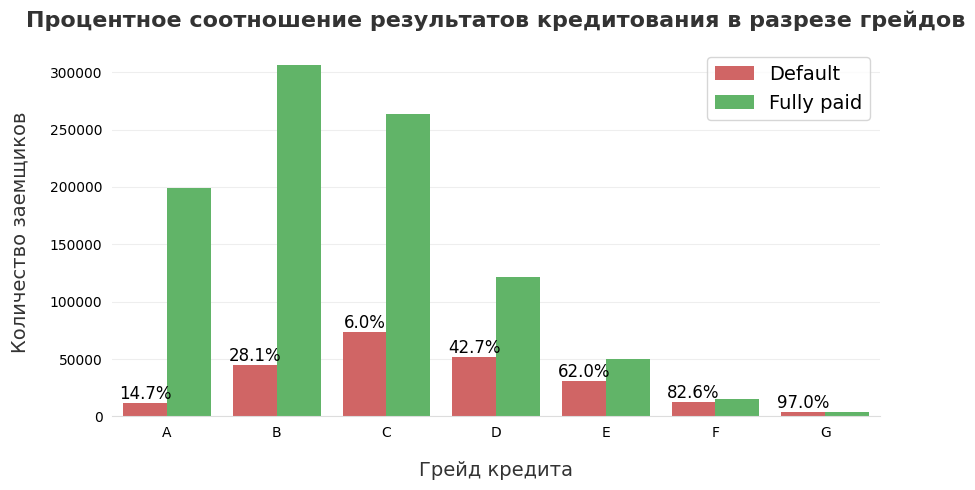

In [ ]:
plot_count(data,
           'grade',
           'loan_result', 
           ['Default', 'Fully paid'],
           'Процентное соотношение результатов кредитования в разрезе грейдов', 
           'Грейд кредита', 
           'Количество заемщиков', 
           sort_alph = True, 
           figsize = (9, 5))

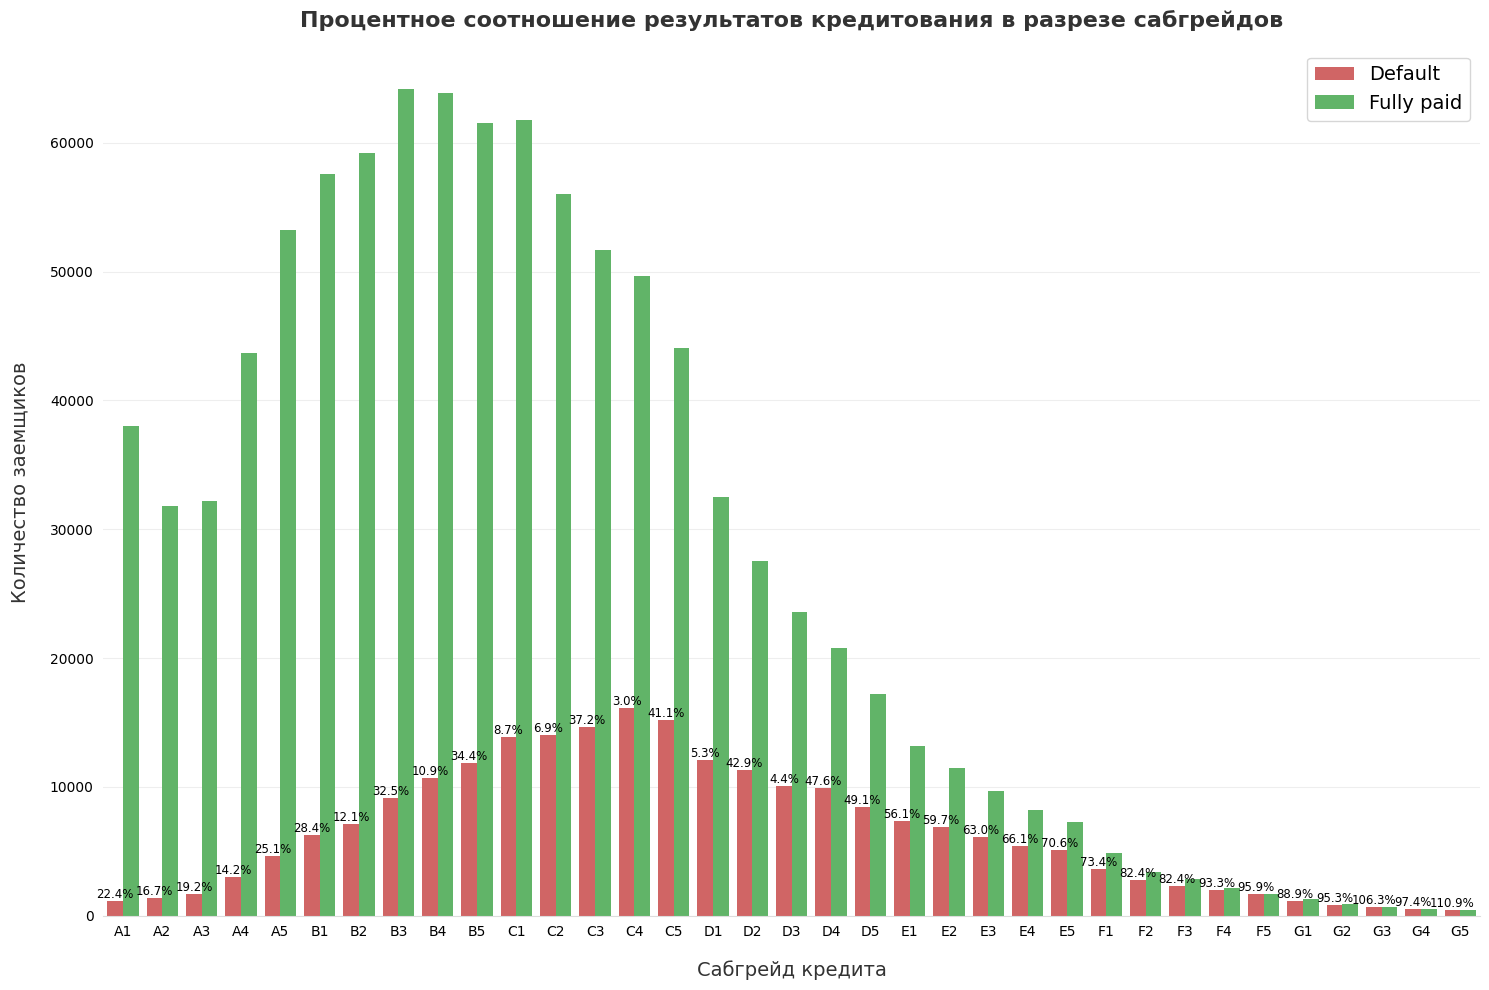

In [ ]:
plot_count(data, 
           'sub_grade', 
           'loan_result',
           ['Default', 'Fully paid'], 
           'Процентное соотношение результатов кредитования в разрезе сабгрейдов',
           'Сабгрейд кредита', 
           'Количество заемщиков',
           perc_fontsize = 8.5,
           sort_alph = True, 
           figsize = (15, 10))

Видно, что и распределение грейдов, и распределение сабгрейдов, и распределение процента кредитов, вышедших в дефолт напоминает нормальное Гаусовское распределение
Так как распределения схожи, а сабгрейд является более детальной переменной грейда, можно отказаться от этой переменной и оставить тоьлько грейд
Грейд кредита можно преобразовать в числовую переменную с помощью мапинга, так как зависимость между грейдами прямая и аналоична числам:
A > B > C > D > E > F > G
Удалим sub_grade и закодируем grade
В результате получим следующее процентное соотношение грейдов:



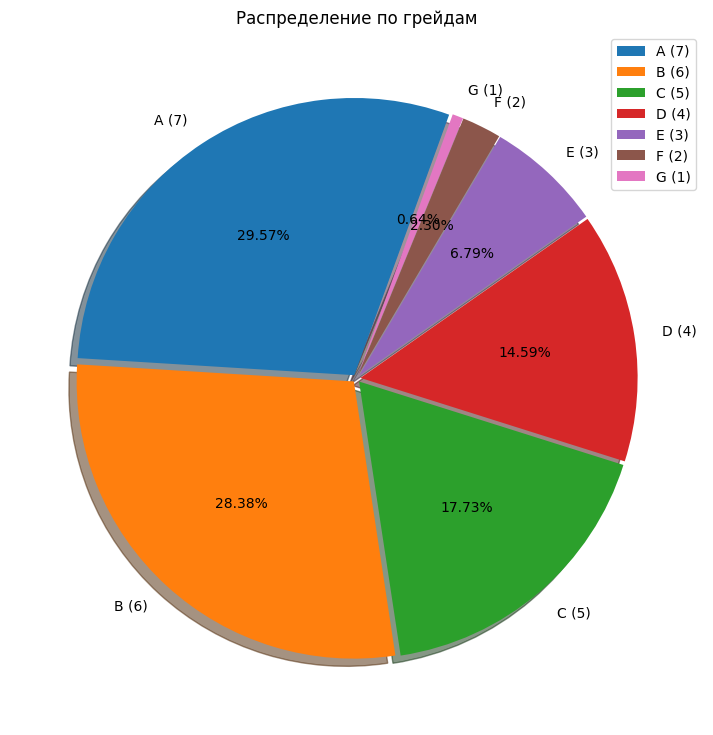

In [ ]:
print('Видно, что и распределение грейдов, и распределение сабгрейдов, и распределение процента кредитов, вышедших в дефолт напоминает нормальное Гаусовское распределение')
print('Так как распределения схожи, а сабгрейд является более детальной переменной грейда, можно отказаться от этой переменной и оставить тоьлько грейд')
print('Грейд кредита можно преобразовать в числовую переменную с помощью мапинга, так как зависимость между грейдами прямая и аналоична числам:')
print('A > B > C > D > E > F > G')
print('Удалим sub_grade и закодируем grade')
print('В результате получим следующее процентное соотношение грейдов:\n')

data.drop('sub_grade', axis = 1, inplace = True)
grade_map = {
    "grade":{
      "A": 7,
      "B": 6,
      "C": 5,
      "D": 4,
      "E": 3,
      "F": 2,
      "G": 1
    }
}
grades = [f'{k[0]} ({k[1]})' for k in grade_map["grade"].items()]

data = data.replace(grade_map)
plot_pie(data['grade'].value_counts(), grades, 'Распределение по грейдам', (10, 9), grades)

#### Перекодирование категориальных переменных

In [ ]:
print('Перекодируем категориальные переменные методом One-hot-encoding')
print(f'Размер датасета до кодирования: {data.shape}')

dummies = data.select_dtypes('object').columns
data = pd.get_dummies(data, columns = dummies, drop_first = True)

print(f'Размер датасета после кодирования: {data.shape}')
print('Типы данных в столбцах:')
print(data.dtypes.value_counts())
print()
data.head()

Перекодируем категориальные переменные методом One-hot-encoding
Размер датасета до кодирования: (1188252, 40)
Размер датасета после кодирования: (1188252, 47)
Типы данных в столбцах:
float64    30
uint8      10
int64       7
dtype: int64



,loan_amnt,grade,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,pub_rec,revol_util,initial_list_status,recoveries,application_type,tot_coll_amt,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,mo_sin_old_il_acct,mort_acc,num_il_tl,num_rev_tl_bal_gt_0,num_tl_90g_dpd_24m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,disbursement_method,debt_settlement_flag,loan_result,lines_acc_diff,num_rev_acc_diff,mo_tl_op_diff,mths_since_recent_diff,num_sats_diff,fico_range_avg,duration,home_ownership_OWN,home_ownership_RENT,purpose_debt_consolidation,purpose_home_improvement,purpose_major_purchase,purpose_other,addr_state_NorthEast,addr_state_SouthEast,addr_state_SouthWest,addr_state_West
0,3600.000,5,55000.000,0,5.910,0.000,1.000,0.000,29.700,1,0.000,1,722.000,9300.000,4.000,20701.000,148.000,1.000,3.000,4.000,0.000,76.900,0.000,0.000,178050.000,7746.000,2400.000,1,1,1,6.000,5.000,125.000,0.000,5.000,677.000,36.000,0,0,1,0,0,0,1,0,0,0
2,20000.000,6,63000.000,0,10.780,0.000,0.000,0.000,56.200,1,0.000,0,0.000,14000.000,6.000,31617.000,125.000,5.000,6.000,3.000,0.000,100.000,50.000,0.000,218418.000,18696.000,6200.000,1,1,1,12.000,3.000,170.000,91.000,4.000,697.000,60.000,0,0,0,1,0,0,0,0,0,0
4,10400.000,2,104433.000,2,25.370,1.000,3.000,0.000,64.500,1,0.000,1,0.000,34000.000,10.000,27644.000,128.000,6.000,10.000,6.000,0.000,96.600,60.000,0.000,439570.000,95768.000,20300.000,1,1,1,23.000,12.000,206.000,3.000,7.000,697.000,60.000,0,0,0,0,1,0,1,0,0,0
5,11950.000,5,34000.000,2,10.200,0.000,0.000,0.000,68.400,1,0.000,1,0.000,12900.000,0.000,2560.000,338.000,0.000,2.000,3.000,0.000,100.000,100.000,0.000,16900.000,12798.000,9400.000,1,1,1,1.000,0.000,22.000,15.559,3.000,692.000,36.000,0,1,1,0,0,0,0,1,0,0
6,20000.000,6,180000.000,0,14.670,0.000,0.000,0.000,84.500,0,0.000,1,0.000,94200.000,6.000,30030.000,142.000,4.000,7.000,6.000,0.000,96.300,100.000,0.000,388852.000,116762.000,31500.000,1,1,1,15.000,7.000,296.000,2.000,8.000,682.000,36.000,0,0,1,0,0,0,0,0,0,0


In [ ]:
from google.colab import files

print('Сохраним результат в csv-файл и будем использовать его в будущем для анализа')
data.to_csv('lending_club_dataset_for_xgbse.csv') 
files.download('lending_club_dataset_for_xgbse.csv')

Сохраним результат в csv-файл и будем использовать его в будущем для анализа


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>